# begin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ctypes
import relo_ode as ro

e:\Projects\money_dynamics\relo_ode.py:53: RuntimeWarning: invalid value encountered in true_divide
  return t,ym[:,0]-1, np.divide((ym[:,1]-1),ym[:,0]-1)


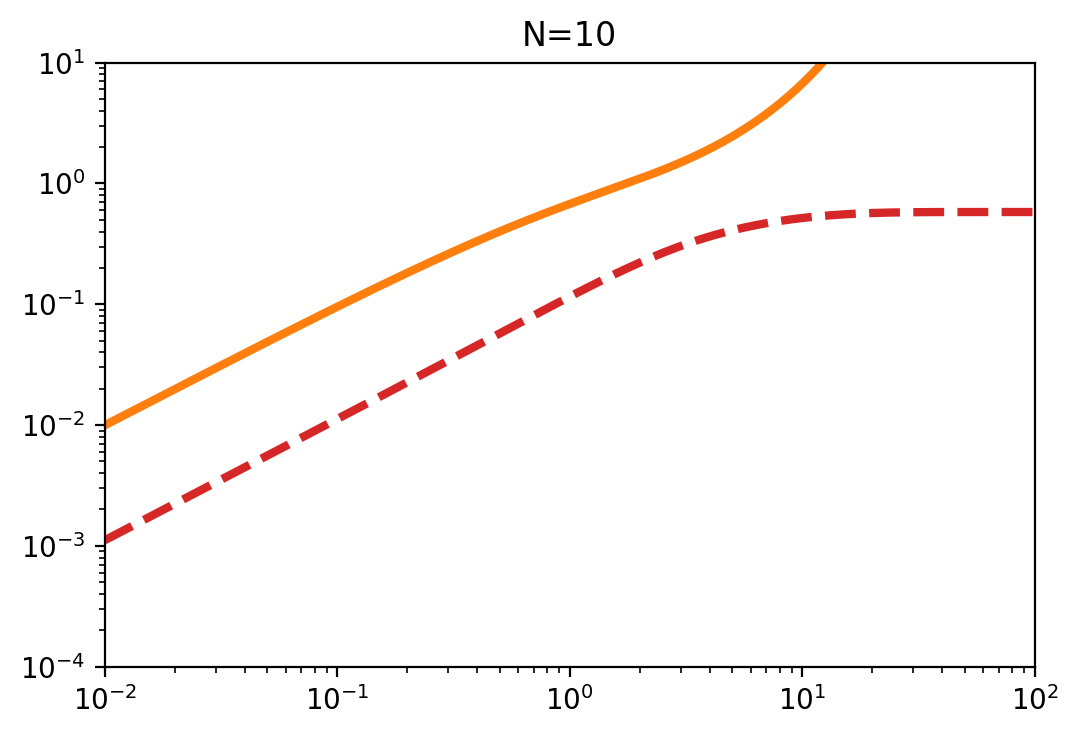

e:\Projects\money_dynamics\relo_ode.py:53: RuntimeWarning: invalid value encountered in true_divide
  return t,ym[:,0]-1, np.divide((ym[:,1]-1),ym[:,0]-1)


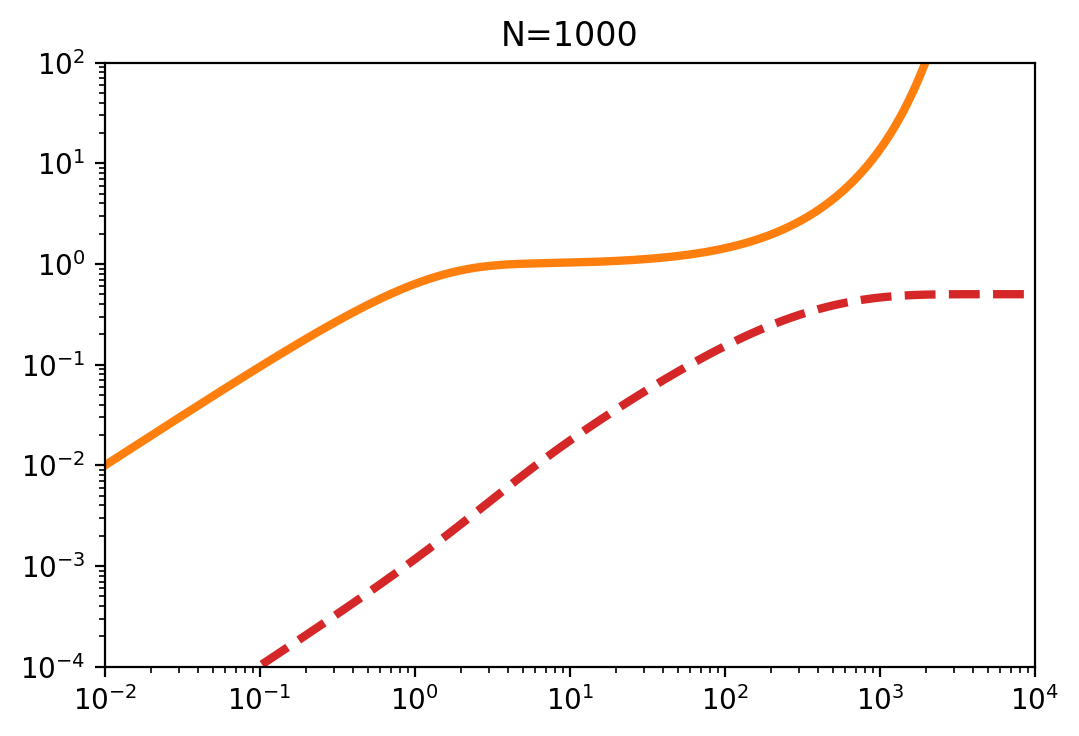

e:\Projects\money_dynamics\relo_ode.py:53: RuntimeWarning: invalid value encountered in true_divide
  return t,ym[:,0]-1, np.divide((ym[:,1]-1),ym[:,0]-1)


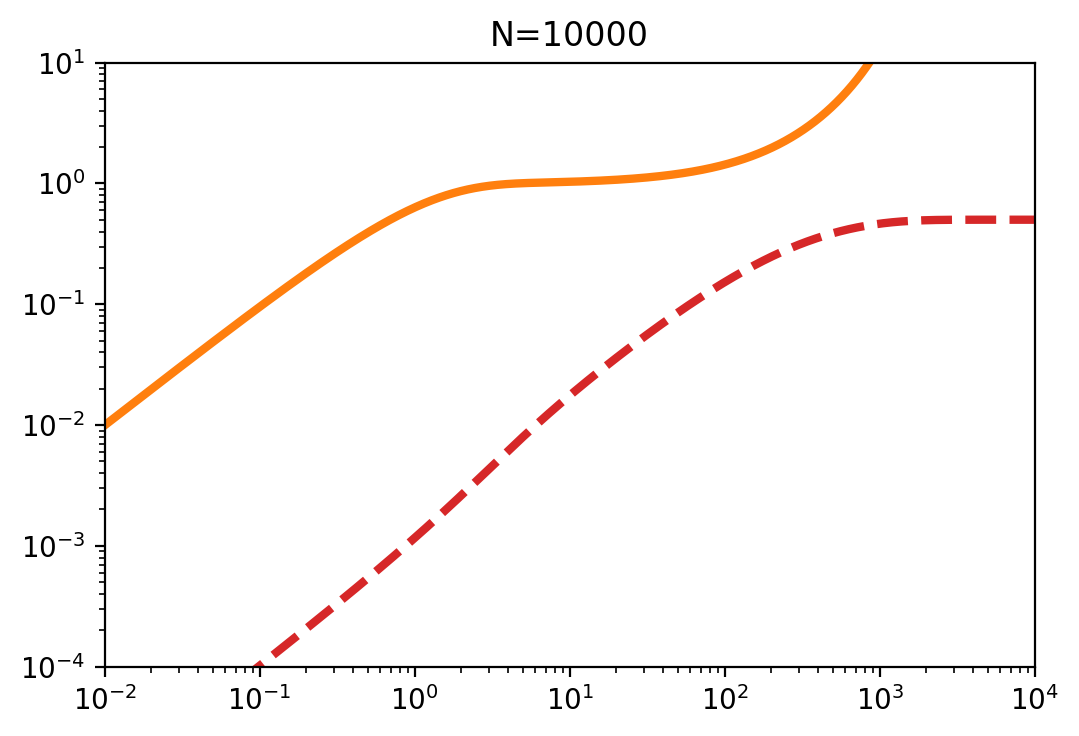

In [4]:
tm=np.arange(0,1000,0.01)
varm,corrm=ro.resl_matrix(tm,N=10)


fig=plt.figure(dpi=200)
ax=fig.add_subplot()

t2,var2,corr2=ro.rel_rk(0.01,T=100,N=10)
ax.plot(t2,var2,lw=3,c="C1")
ax.plot(t2,corr2,'--',lw=3,c="C3")

ax.set_title("N=10")
ax.set_xlim([1e-2,1e2])
ax.set_ylim([1e-4,1e1])
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


fig=plt.figure(dpi=200)
ax=fig.add_subplot()

t2,var2,corr2=ro.rel_rk(0.01,T=10000,N=1000)
ax.plot(t2,var2,lw=3,c="C1")
ax.plot(t2,corr2,'--',lw=3,c="C3")

ax.set_title("N=1000")
ax.set_xlim([1e-2,1e4])
ax.set_ylim([1e-4,1e2])
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()



fig=plt.figure(dpi=200)
ax=fig.add_subplot()

t2,var2,corr2=ro.rel_rk(0.01,T=10000,N=1000)
ax.plot(t2,var2,lw=3,c="C1")
ax.plot(t2,corr2,'--',lw=3,c="C3")

ax.set_title("N=10000")
ax.set_xlim([1e-2,1e4])
ax.set_ylim([1e-4,1e1])
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [ ]:
t2,var2,corr2=ro.rel_rkj(0.01,T=1000,N=10)

fig=plt.figure(dpi=200)
ax=fig.add_subplot()

ax.plot(t2,var2)
ax.plot(t2,corr2,'--')

# ax.set_xlim([1e-1,1e4])
# ax.set_ylim([1e-3,1e2])

# ax.set_xlim([1e-2,1e2])
# ax.set_ylim([1e-4,1e1])

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()

## plot data

## 10

In [54]:
# x=np.loadtxt("./jsm/data.txt",delimiter='\s+')
# df=pd.read_table("./jsm/data.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/data_time10.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/data_time30.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/data_time30_10.txt",names=["step","vm","vi","vivj"],sep=',')
df=pd.read_table("./jsm/A10_R10000_T001/data_time001.txt",names=["step","vm","vi","vivj"],sep=',')
df["var"]=df.vi - df.vm**2
# df["var"]=df.vi - 1
df["cij"]=(df.vivj - df.vm**2)#/(df.var)
df

,step,vm,vi,vivj,var,cij
0,0,1.000000,1.00000,1.00000,0.000000,0.000000
1,1,1.000160,1.01037,1.00031,0.010050,-0.000010
2,2,1.000120,1.02012,1.00025,0.019880,0.000010
3,3,1.000180,1.02993,1.00039,0.029570,0.000030
4,4,1.000290,1.03992,1.00070,0.039340,0.000120
...,...,...,...,...,...,...
9995,9995,0.301436,31.10670,19.82930,31.015836,19.738436
9996,9996,0.300083,30.35990,19.37880,30.269850,19.288750
9997,9997,0.295828,28.11120,18.52460,28.023686,18.437086
9998,9998,0.295840,28.73450,18.48900,28.646979,18.401479


In [56]:
t2,var2,corr2=ro.rel_rk(0.01,T=100,N=10)

e:\Projects\money_dynamics\relo_ode.py:53: RuntimeWarning: invalid value encountered in true_divide
  return t,ym[:,0]-1, np.divide((ym[:,1]-1),ym[:,0]-1)


<ipython-input-57-a4a40df4d8a8>:10: RuntimeWarning: invalid value encountered in true_divide
  cij2=df["cij"].values[::inters]/var1


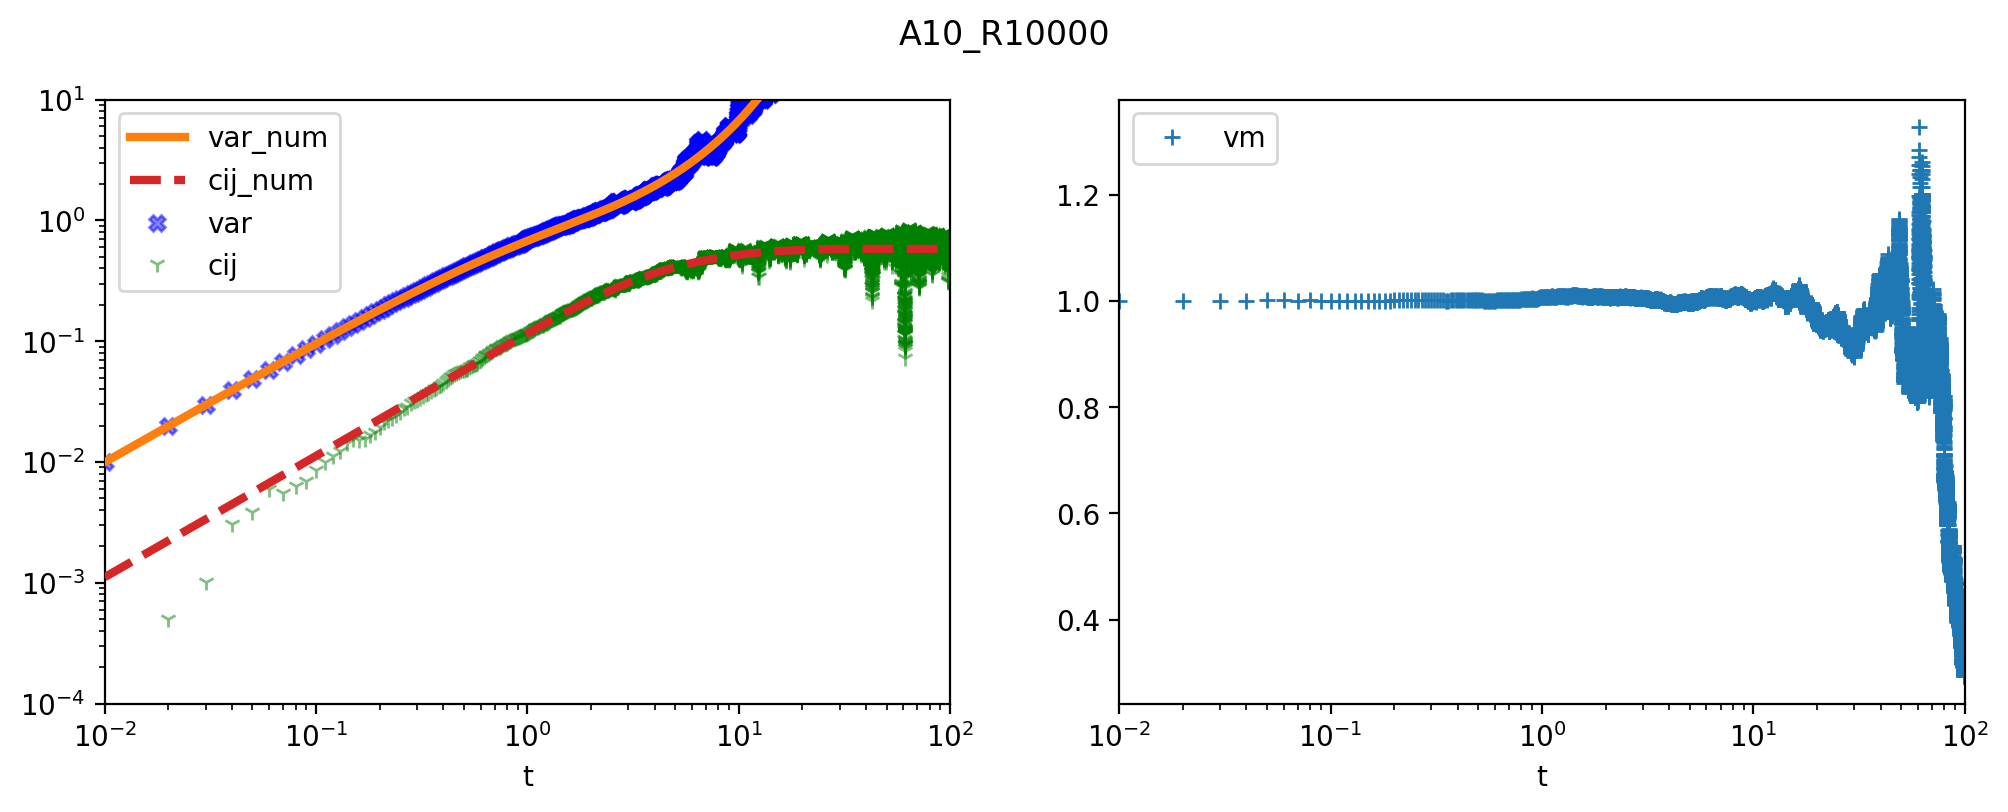

In [57]:
fig=plt.figure(figsize=(12,4),dpi=200)
ax=fig.add_subplot(1,2,1)

ax.plot(t2,var2,lw=3,c="C1",label="var_num",zorder=3)
ax.plot(t2,corr2,'--',lw=3,c="C3",label="cij_num",zorder=3)

inters=1
dfx=df.step.values[::inters]*0.01
var1=df["var"].values[::inters]
cij2=df["cij"].values[::inters]/var1

ax.plot(dfx,var1,'X',c='b',label="var",alpha=0.5,zorder=1)
ax.plot(dfx,cij2,'1',c='g',label="cij",alpha=0.5,zorder=1)
# ax.set_xlim([1e-1,1e4])
# ax.set_ylim([1e-3,1e2])

ax.set_xlabel('t')
ax.set_xlim([1e-2,1e2])
ax.set_ylim([1e-4,1e1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

ax=fig.add_subplot(1,2,2)
ax.plot(dfx,df["vm"],'+',label="vm")
ax.set_xlabel('t')
ax.set_xlim([1e-2,1e2])
ax.set_xscale('log')
ax.legend()

fig.suptitle("A10_R10000")
plt.show()

## 1000

In [23]:
# df=pd.read_table("./jsm/data_time100_1000.txt",names=["step","vm","vi","vivj"],sep=',')
df=pd.read_table("./jsm/A1000_R1000_T001/data_time1000_1000.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/A1000_R10000_T001-2/data_time001.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/A1000_R10000_T01/data.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/A1000_R1000_T001-J1/data.txt",names=["step","vm","vi","vivj"],sep=',')
df["var"]=df.vi - df.vm**2
# df["var"]=df.vi - 1
df["cij"]=(df.vivj - df.vm**2)#/(df.var)
df

,step,vm,vi,vivj,var,cij
0,0,1.000000,1.00000,1.000000,0.000000,0.000000e+00
1,1,1.000000,1.01000,1.000010,0.010000,1.000000e-05
2,2,0.999958,1.01982,0.999915,0.019904,-1.001764e-06
3,3,1.000200,1.03014,1.000400,0.029740,-4.000000e-08
4,4,1.000220,1.03986,1.000450,0.039420,9.951600e-06
...,...,...,...,...,...,...
99995,99995,0.897014,9.14505,5.012870,8.340416,4.208236e+00
99996,99996,0.896812,9.07989,5.006390,8.275618,4.202118e+00
99997,99997,0.896504,9.04806,4.993440,8.244341,4.189721e+00
99998,99998,0.896543,9.08297,4.991510,8.279181,4.187721e+00


In [ ]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot(3,1,1)
ax.plot(df.step,df.vm)
ax=fig.add_subplot(3,1,2)
ax.plot(df.step,df.vi)
ax=fig.add_subplot(3,1,3)
ax.plot(df.step,df.vivj)
plt.tight_layout()
plt.show()

In [3]:
t2,var2,corr2=ro.rel_rk(0.01,T=1000,N=1000)

e:\Projects\money_dynamics\relo_ode.py:53: RuntimeWarning: invalid value encountered in true_divide
  return t,ym[:,0]-1, np.divide((ym[:,1]-1),ym[:,0]-1)


<ipython-input-24-623ded3fb6fb>:10: RuntimeWarning: invalid value encountered in true_divide
  cij2=df["cij"].values[::inters]/var1


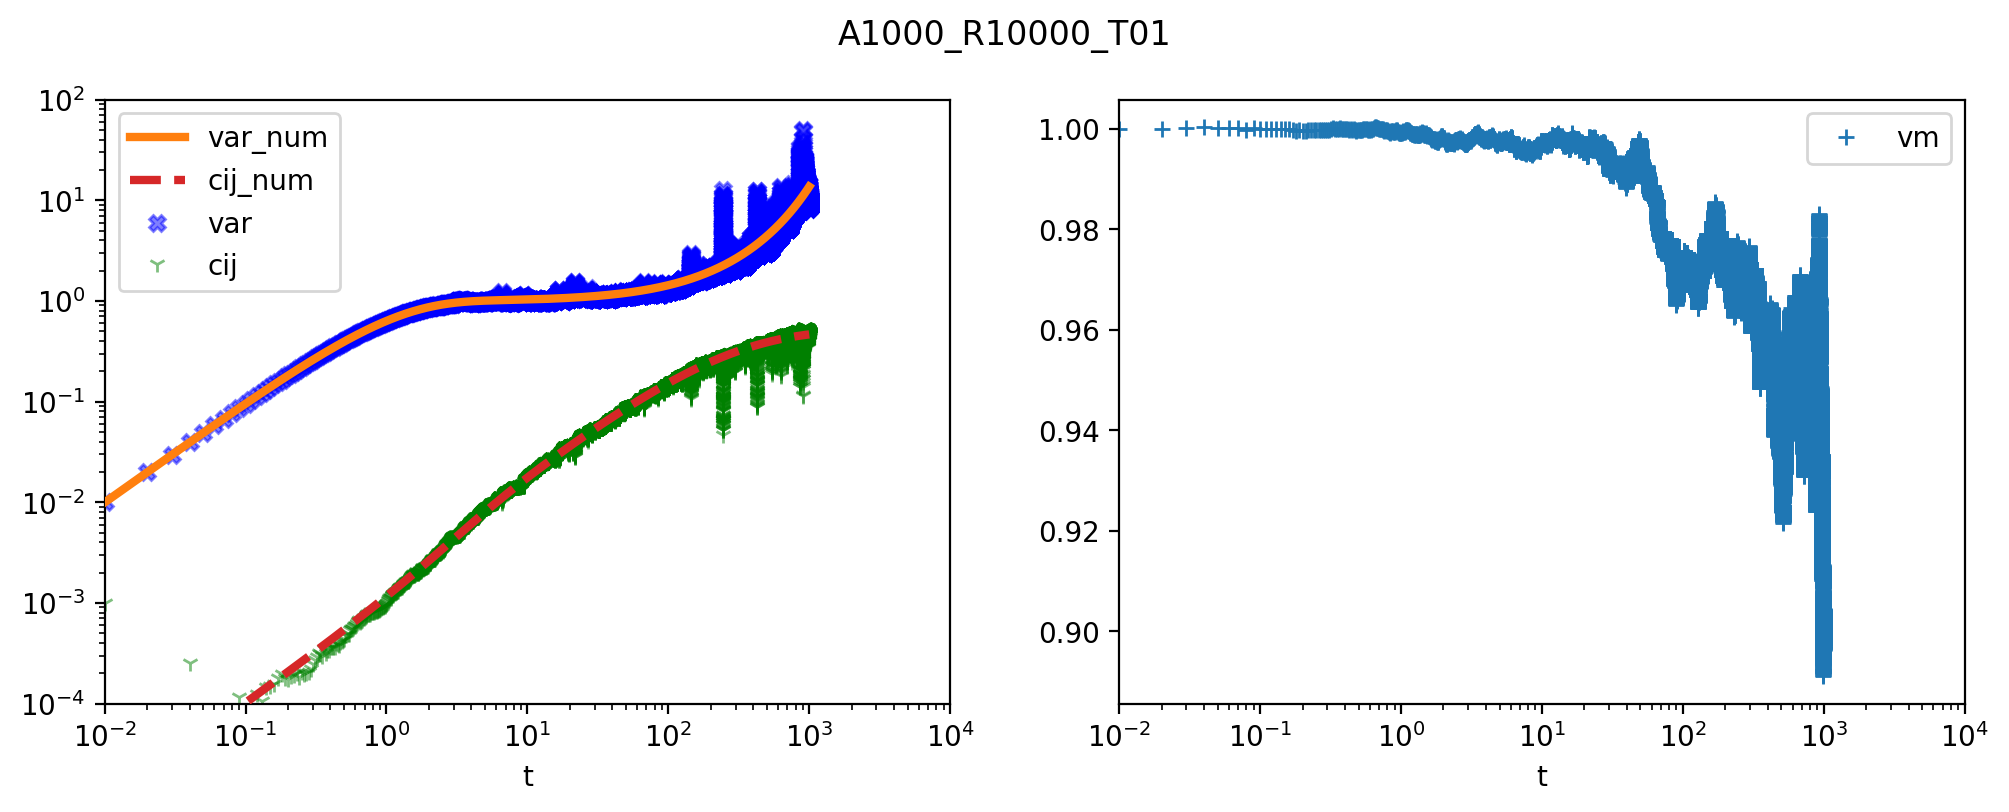

In [24]:
fig=plt.figure(figsize=(12,4),dpi=200)
ax=fig.add_subplot(1,2,1)

ax.plot(t2,var2,lw=3,c="C1",label="var_num",zorder=3)
ax.plot(t2,corr2,'--',lw=3,c="C3",label="cij_num",zorder=3)

inters=1
dfx=df.step.values[::inters]*0.01
var1=df["var"].values[::inters]
cij2=df["cij"].values[::inters]/var1

ax.plot(dfx,var1,'X',c='b',label="var",alpha=0.5,zorder=1)
ax.plot(dfx,cij2,'1',c='g',label="cij",alpha=0.5,zorder=1)
# ax.set_xlim([1e-1,1e4])
# ax.set_ylim([1e-3,1e2])

ax.set_xlabel('t')
ax.set_xlim([1e-2,1e4])
ax.set_ylim([1e-4,1e2])

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

ax=fig.add_subplot(1,2,2)
ax.plot(dfx,df["vm"],'+',label="vm")
ax.set_xlabel('t')
ax.set_xlim([1e-2,1e4])

ax.set_xscale('log')
ax.legend()

fig.suptitle("A1000_R10000_T01")
plt.show()

In [ ]:
t2,var2,corr2=ro.rel_rkj(0.01,T=1000,N=1000)
plt.figure()
plt.plot(t2,var2)
plt.plot(t2,corr2)
# plt.yscale("log")
plt.show()


## 10000

In [42]:

# df=pd.read_table("./jsm/data_time100_1000.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/A10000_R1000T001/data_time10000_1000.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/A10000_R1000_T001/data_time001.txt",names=["step","vm","vi","vivj"],sep=',')
df=pd.read_table("./jsm/A1e4_R1000_T001/data_time001.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/A1e4_R1e4_T01/data.txt",names=["step","vm","vi","vivj"],sep=',')
df["var"]=df.vi - df.vm**2
# df["var"]=df.vi - 1
df["cij"]=(df.vivj - df.vm**2)#/(df.var)
df

,step,vm,vi,vivj,var,cij
0,0,1.000000,1.00000,1.000000,0.000000,0.000000e+00
1,1,1.000020,1.01004,1.000040,0.010000,-3.999998e-10
2,2,1.000030,1.01997,1.000070,0.019910,9.999100e-06
3,3,1.000010,1.02973,1.000030,0.029710,9.999900e-06
4,4,0.999972,1.03934,0.999945,0.039396,9.992160e-07
...,...,...,...,...,...,...
5759,5759,0.994691,1.98622,0.999823,0.996810,1.041281e-02
5760,5760,0.994670,1.98440,0.999764,0.995032,1.039559e-02
5761,5761,0.994640,1.98551,0.999701,0.996201,1.039227e-02
5762,5762,0.994633,1.98754,0.999665,0.998245,1.037020e-02


In [39]:
t2,var2,corr2=ro.rel_rk(0.01,T=1000,N=10000)

e:\Projects\money_dynamics\relo_ode.py:53: RuntimeWarning: invalid value encountered in true_divide
  return t,ym[:,0]-1, np.divide((ym[:,1]-1),ym[:,0]-1)


<ipython-input-44-04e11f29efda>:10: RuntimeWarning: invalid value encountered in true_divide
  cij2=df["cij"].values[::inters]/var1


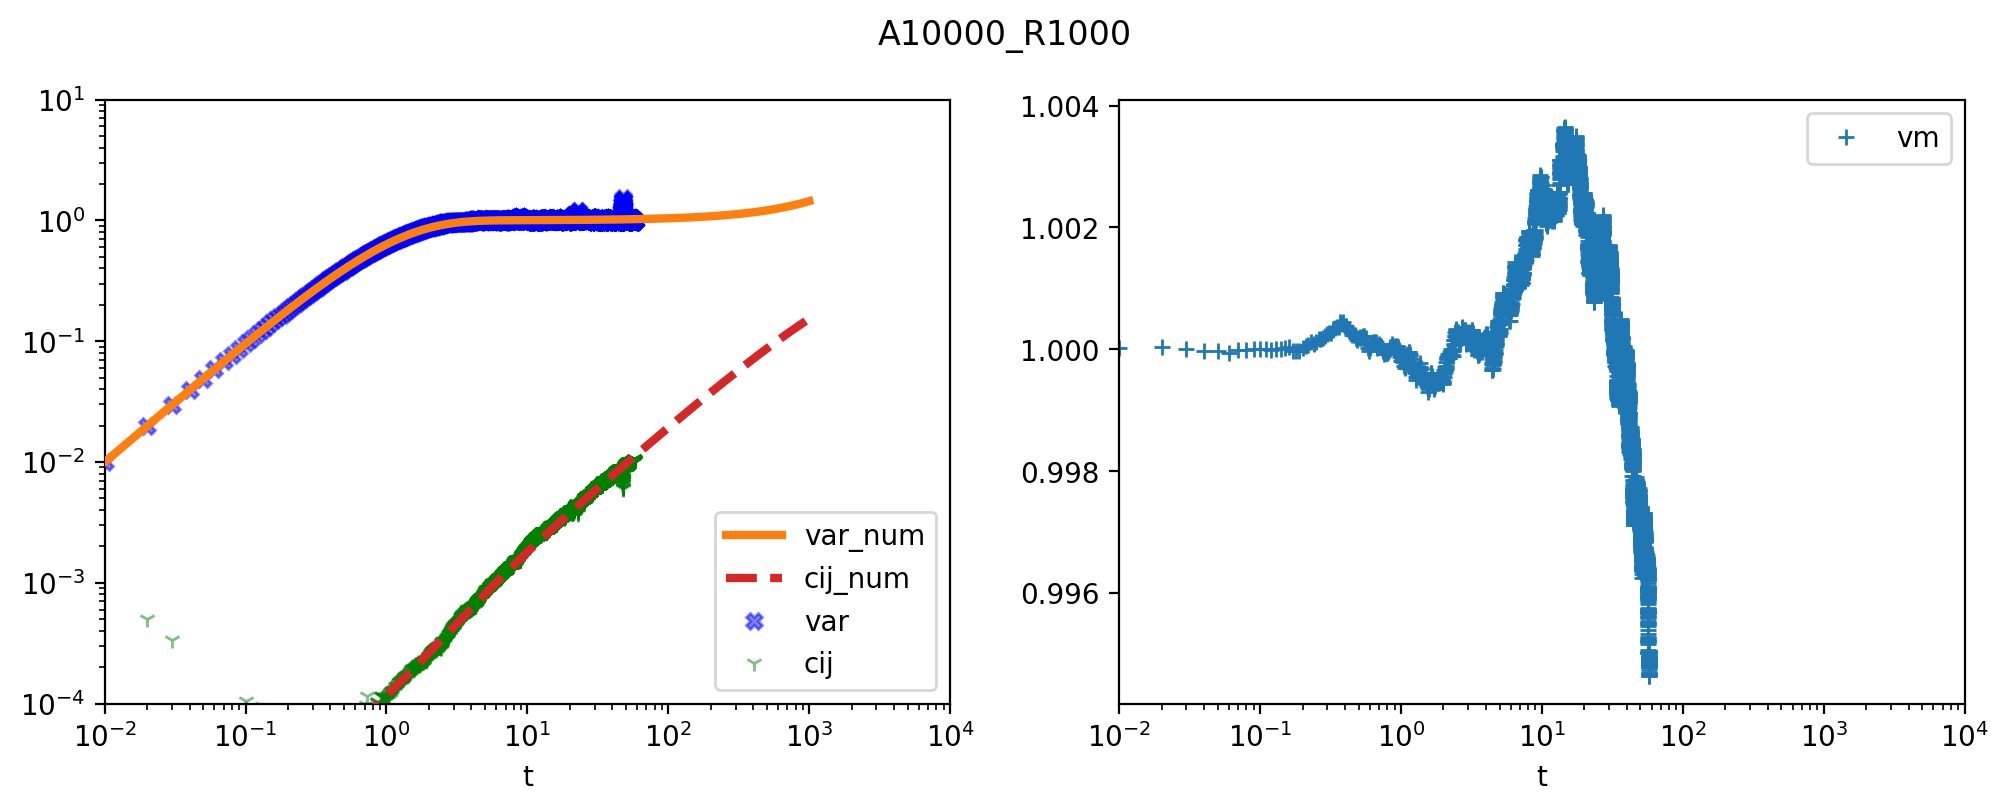

In [44]:
fig=plt.figure(figsize=(12,4),dpi=200)
ax=fig.add_subplot(1,2,1)

ax.plot(t2,var2,lw=3,c="C1",label="var_num",zorder=3)
ax.plot(t2,corr2,'--',lw=3,c="C3",label="cij_num",zorder=3)

inters=1
dfx=df.step.values[::inters]*0.01
var1=df["var"].values[::inters]
cij2=df["cij"].values[::inters]/var1

ax.plot(dfx,var1,'X',c='b',label="var",alpha=0.5,zorder=1)
ax.plot(dfx,cij2,'1',c='g',label="cij",alpha=0.5,zorder=1)


ax.set_xlabel('t')
ax.set_xlim([1e-2,1e4])
ax.set_ylim([1e-4,1e1])

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

ax=fig.add_subplot(1,2,2)
ax.plot(dfx,df["vm"],'+',label="vm")
ax.set_xlabel('t')
ax.set_xlim([1e-2,1e4])

ax.set_xscale('log')
ax.legend()

fig.suptitle("A10000_R1000")
plt.show()


## distri

In [94]:

for i in range(100):
    n=i*1000
    # df=pd.read_table("./jsm/1000_1000/data_time1000_1000.%d.txt"%n,sep=',',header=None)
    df=pd.read_table("./jsm/A1000_R1000_T001/data_time1000_1000.%d.txt"%n,sep=',',header=None)
    data=df.values
    data=data[~np.isnan(data)]
    print(n,data.mean(),data.std(ddof=1))

0 1.0000036776980004 0.09996055491989238
1000 0.9975945032438998 1.0146996586005357
2000 0.9966512083876002 1.029427347575782
3000 0.9915799288814997 1.0485317039497393
4000 0.990065937249 1.0362454343244172
5000 0.9958377376341004 1.066186337658227
6000 0.9863100204591999 1.0813258699546215
7000 0.9792364300036004 1.1072549705959547
8000 0.9761608743978003 1.1034396807553015
9000 0.9653937661942001 1.1013497262272502


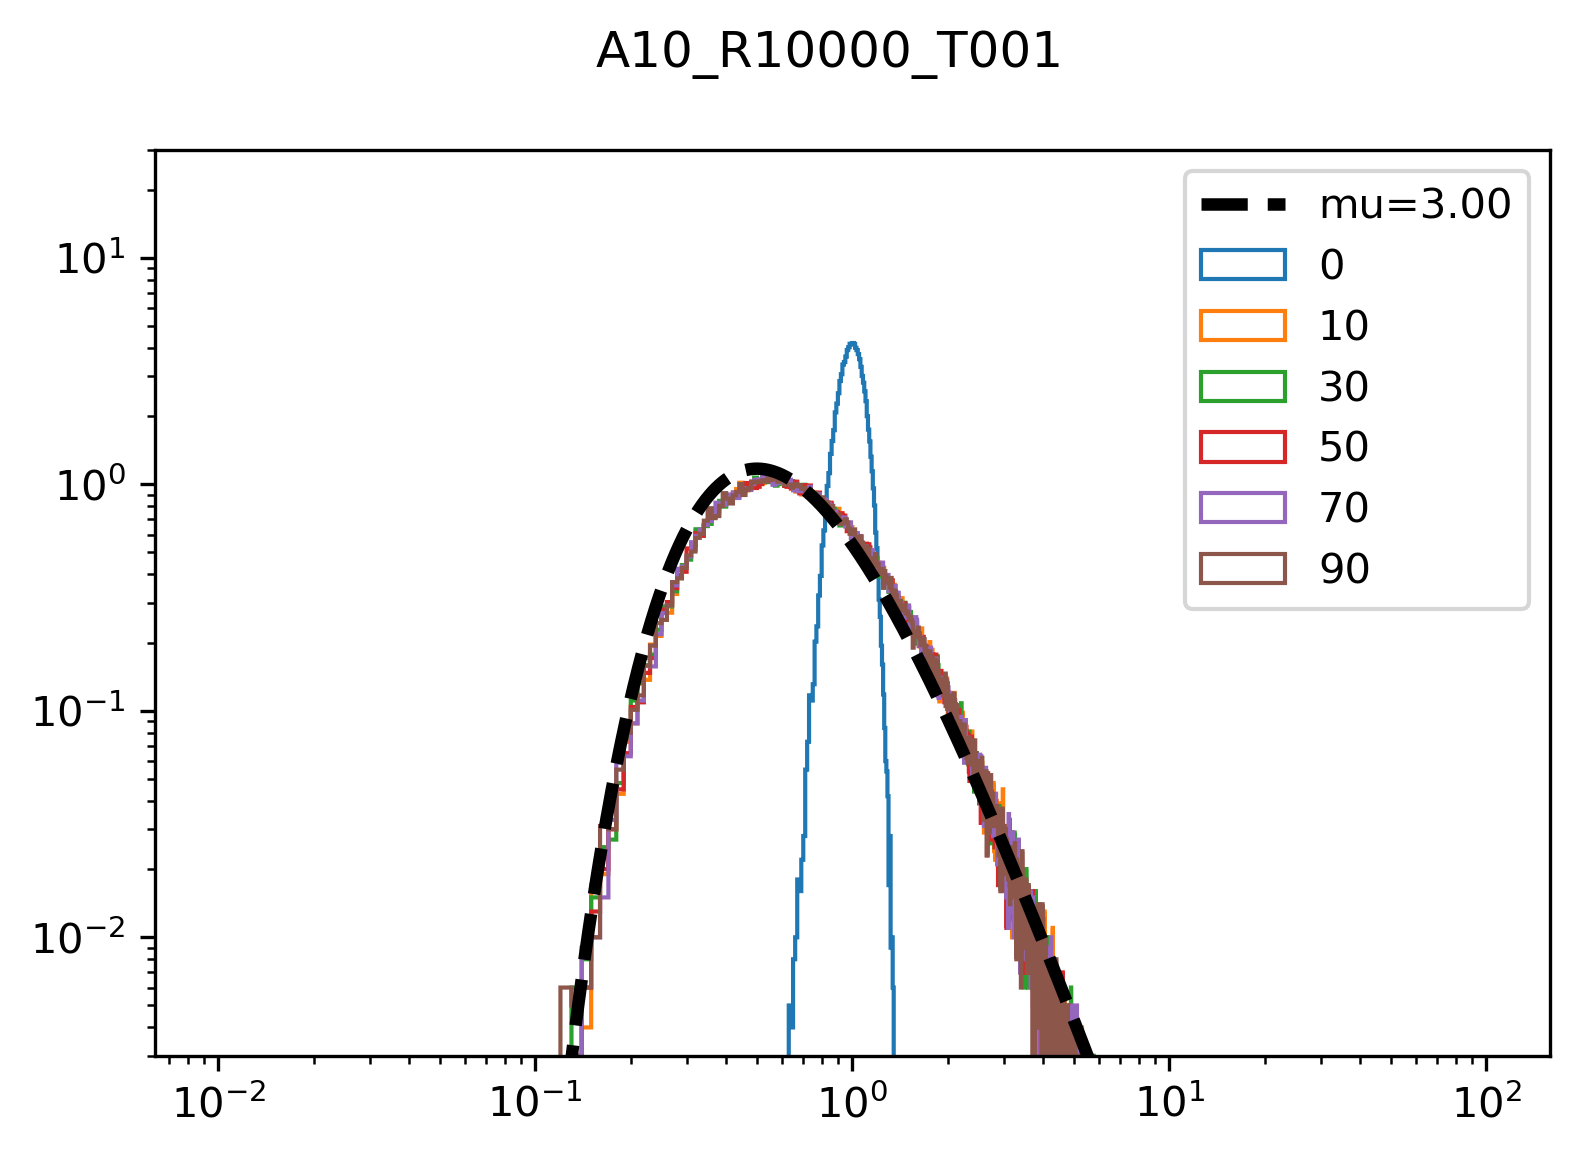

In [67]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()

# v1=[]
# v2=[]
# v3=[]
for i in [0,1,3,5,7,9]:
    n=i*1000
    # df=pd.read_table("./jsm/A10000_R1000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001/data_time1000_1000.%d.txt"%n,sep=',',header=None)
    df=pd.read_table("./jsm/A10_R10000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A10_R1e5_T0001-J1/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001-2/data_time001.%d.txt"%n,sep=',',header=None)
    data=df.values
    # data=data[~np.isnan(data)]#.reshape(10000,10).mean(axis=1)
    # data=data[~np.isnan(data)]
    # print(n,data.mean(),data.std(ddof=1))
    data=data[~np.isnan(data)].reshape(10000,10)#.mean(axis=1)
    norm = data.mean(axis=1).reshape(10000,1)
    data=data/norm

    # v1.append((data.flatten()).mean())
    # v2.append((data.flatten()**2).mean())
    # v3.append(calcij(data))
    # print(n)

    ax.hist(data.flatten(),bins=np.linspace(0.01,100,10000),histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
# hi,bi=np.histogram(data,bins=100)
# ax.plot(bi[:-1],hi)


w=np.arange(0.01,100,0.001)
miu=3
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()
ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)

ax.set_ylim([3*1e-3,30])
# ax.set_xlim([1e-1,10])

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
fig.suptitle("A10_R10000_T001")
plt.show()

In [106]:
def calcij(a):
    l=len(a[0])
    l2=len(a)
    s1=[]
    for k in range(l2):
        suma=0
        n=0
        b=a[k]
        for i in range(l):
            for j in range(i+1,l):
                if i == j : continue
                suma += b[i]*b[j]
                n+=1
        s1.append(suma/n)
        # print(k,end=' ')
    return np.mean(s1)

0
1000
5000
10000
30000


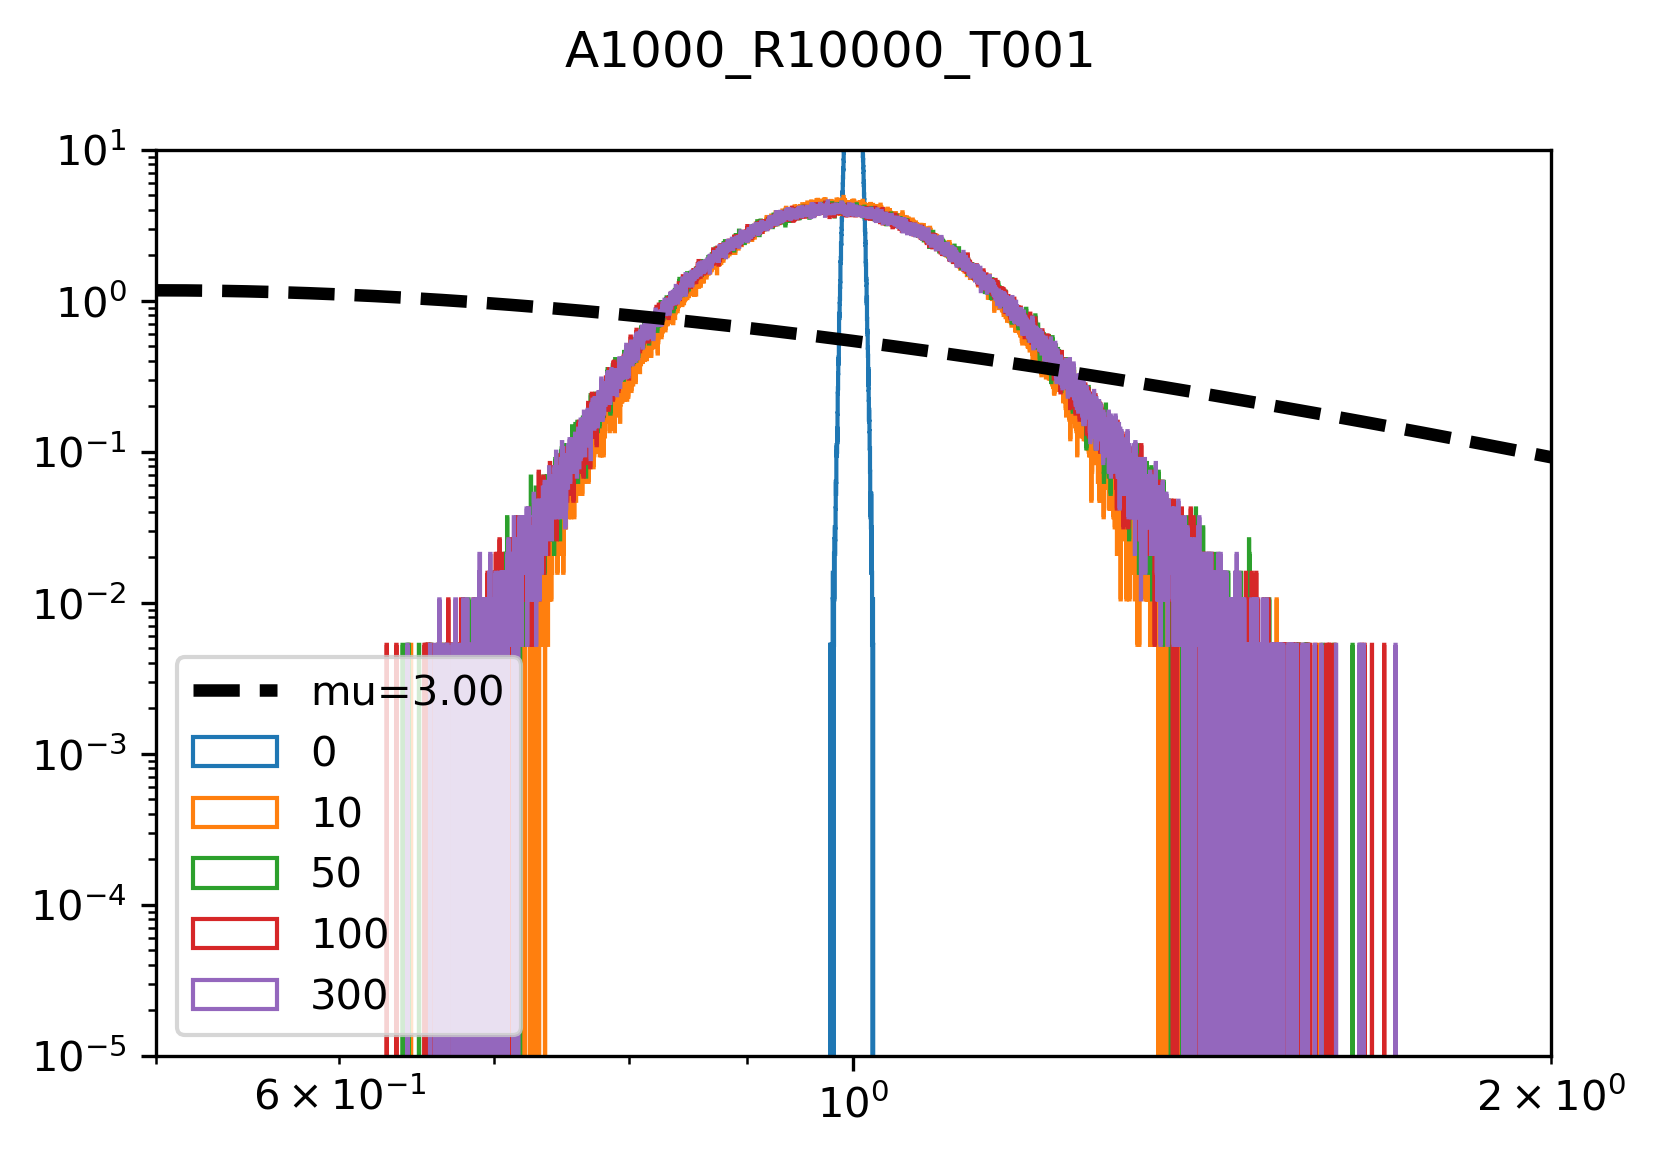

In [8]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()

# sotest = ctypes.cdll.LoadLibrary("./test/pcc.so")
# sotest.mean_cij.restype=ctypes.c_float

v1=[]
v2=[]
v3=[]
# for i in [0,0.1,0.5,0.8,1,3,6]:
# for i in [0,1,2,3,4]:
# for i in [0,1,5,10,30,50]:
for i in [0,1,5,10,30,]:
    n=i*1000
    # df=pd.read_table("./jsm/A10_R10000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R10000_T001-2/data_time001.%d.txt"%n,sep=',',header=None)
    df=pd.read_table("./jsm/A1000_R1000_T001_sgima01/data.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001/data_time1000_1000.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R10000_T01/data.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001-J1/data.%d.txt"%n,sep=',',header=None)
    data=df.values
    # data=data[~np.isnan(data)].reshape(1000,1000).mean(axis=1)
    data=data[~np.isnan(data)].reshape(1000,1000)#.mean(axis=1)
    norm = data.mean(axis=1).reshape(1000,1)
    data=data/norm


    # v1.append((data.flatten()).mean())
    # v2.append((data.flatten()**2).mean())

    # n1,n2=data.shape
    # x=data.flatten()
    # lenth=n1*n2
    # cbarr=ctypes.c_float * lenth
    # cba=cbarr()
    # for k in range(lenth):
    #     cba[k] = x[k]
    # v3.append(sotest.mean_cij(cba,n2,n1))

    print(n)
    ax.hist(data.flatten(),bins=np.linspace(0.1,2,10000),histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
    # hi,bi=np.histogram(data,bins=100)
    # ax.plot(bi[:-1],hi)

w=np.arange(0.01,100,0.001)
miu=3
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()
ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)

ax.set_ylim([1e-5,10])
# ax.set_xlim([5*1e-2,100])
# ax.set_ylim([5*1e-4,5])
ax.set_xlim([5e-1,2])

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
fig.suptitle("A1000_R10000_T001")
plt.show()


In [74]:
var=np.asarray(v2)-np.asarray(v1)**2
cij=(np.asarray(v3)-np.asarray(v1)**2)/var

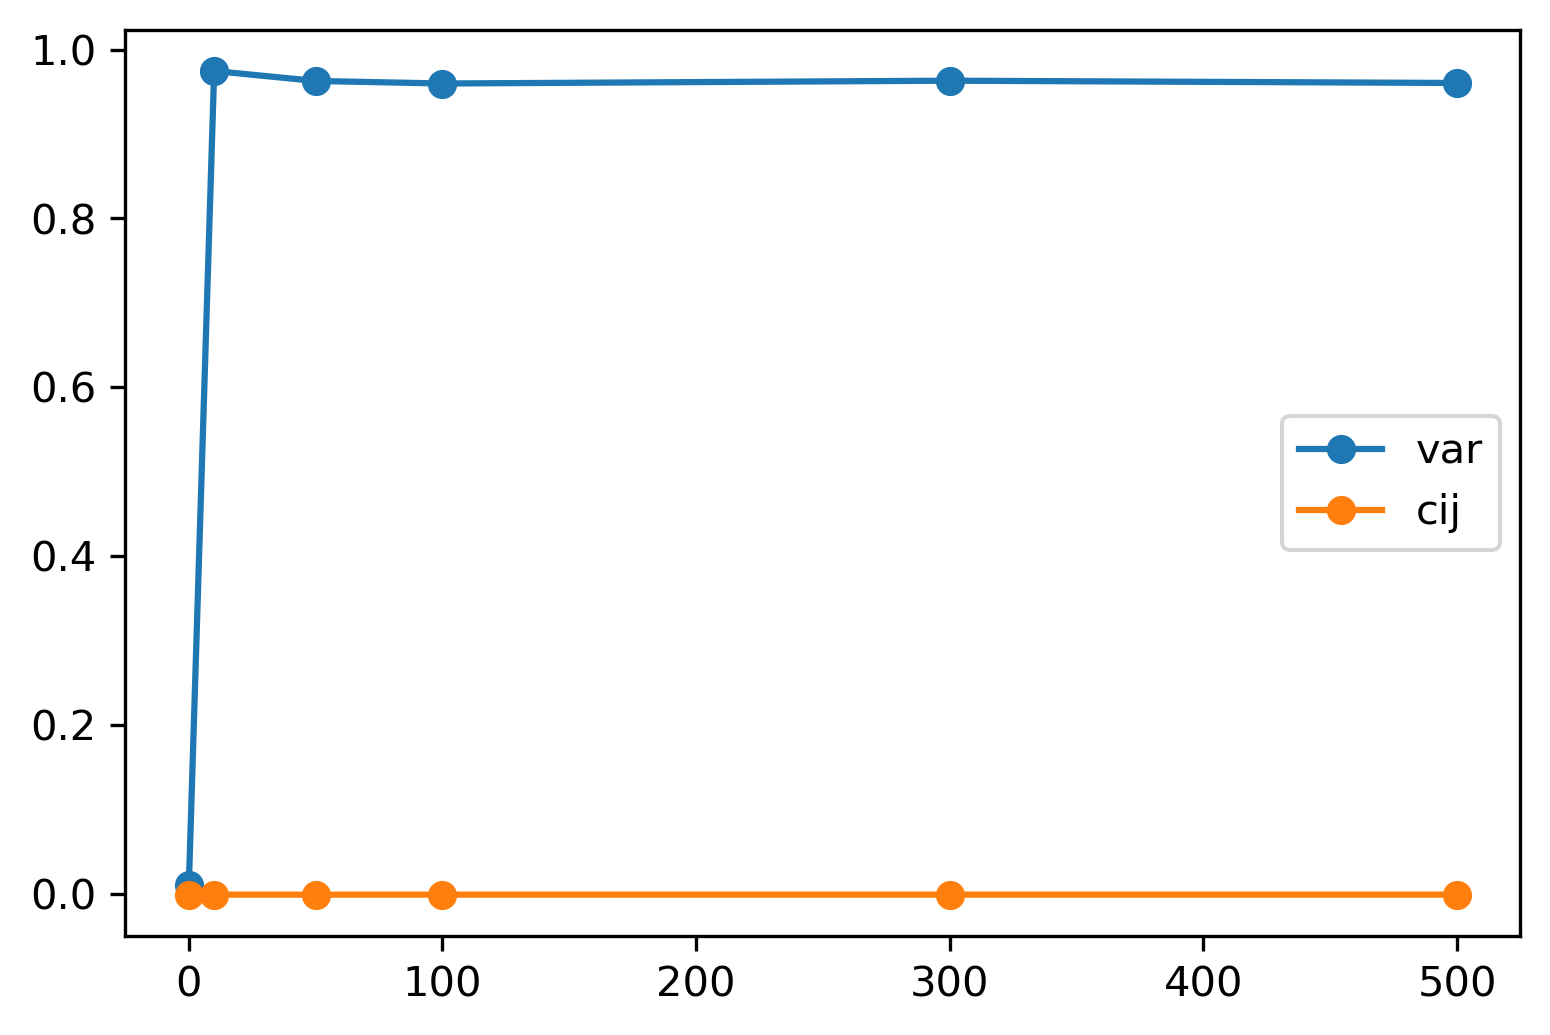

In [77]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()
x=[0.01,10,50,100,300,500]

ax.plot(x,var,marker='o',label="var")
ax.plot(x,cij,marker='o',label="cij")
# ax.set_xscale("log")
# ax.set_yscale("log")

# ax.set_ylim([1e-4,100])
# ax.set_xlim([1e-2,10000])
ax.legend()
plt.show()

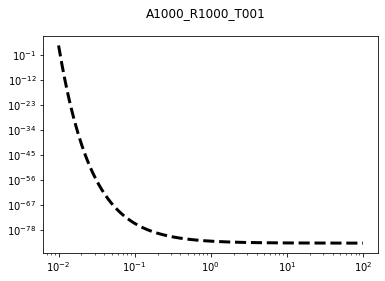

In [57]:
fig=plt.figure()
ax=fig.add_subplot()
w=np.arange(0.01,100,0.001)
miu=-1
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()
ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)
ax.set_yscale("log")
ax.set_xscale("log")
fig.suptitle("A1000_R1000_T001")
# ax.set_ylim([5*1e-4,5])
# ax.set_xlim([5e-3,1000])

plt.show()

No handles with labels found to put in legend.


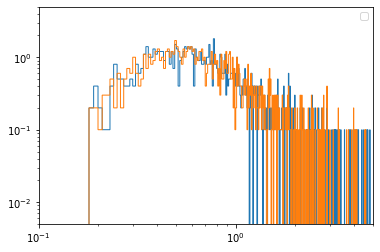

In [15]:
fig=plt.figure()
ax=fig.add_subplot()
ax.hist(data[0,:],bins=np.linspace(0.01,100,10000),histtype='step',density=True)
ax.hist(data[10,:],bins=np.linspace(0.01,100,10000),histtype='step',density=True)
ax.set_ylim([1e-5,10])
ax.set_ylim([5*1e-3,5])
ax.set_xlim([1e-1,5])

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
plt.show()

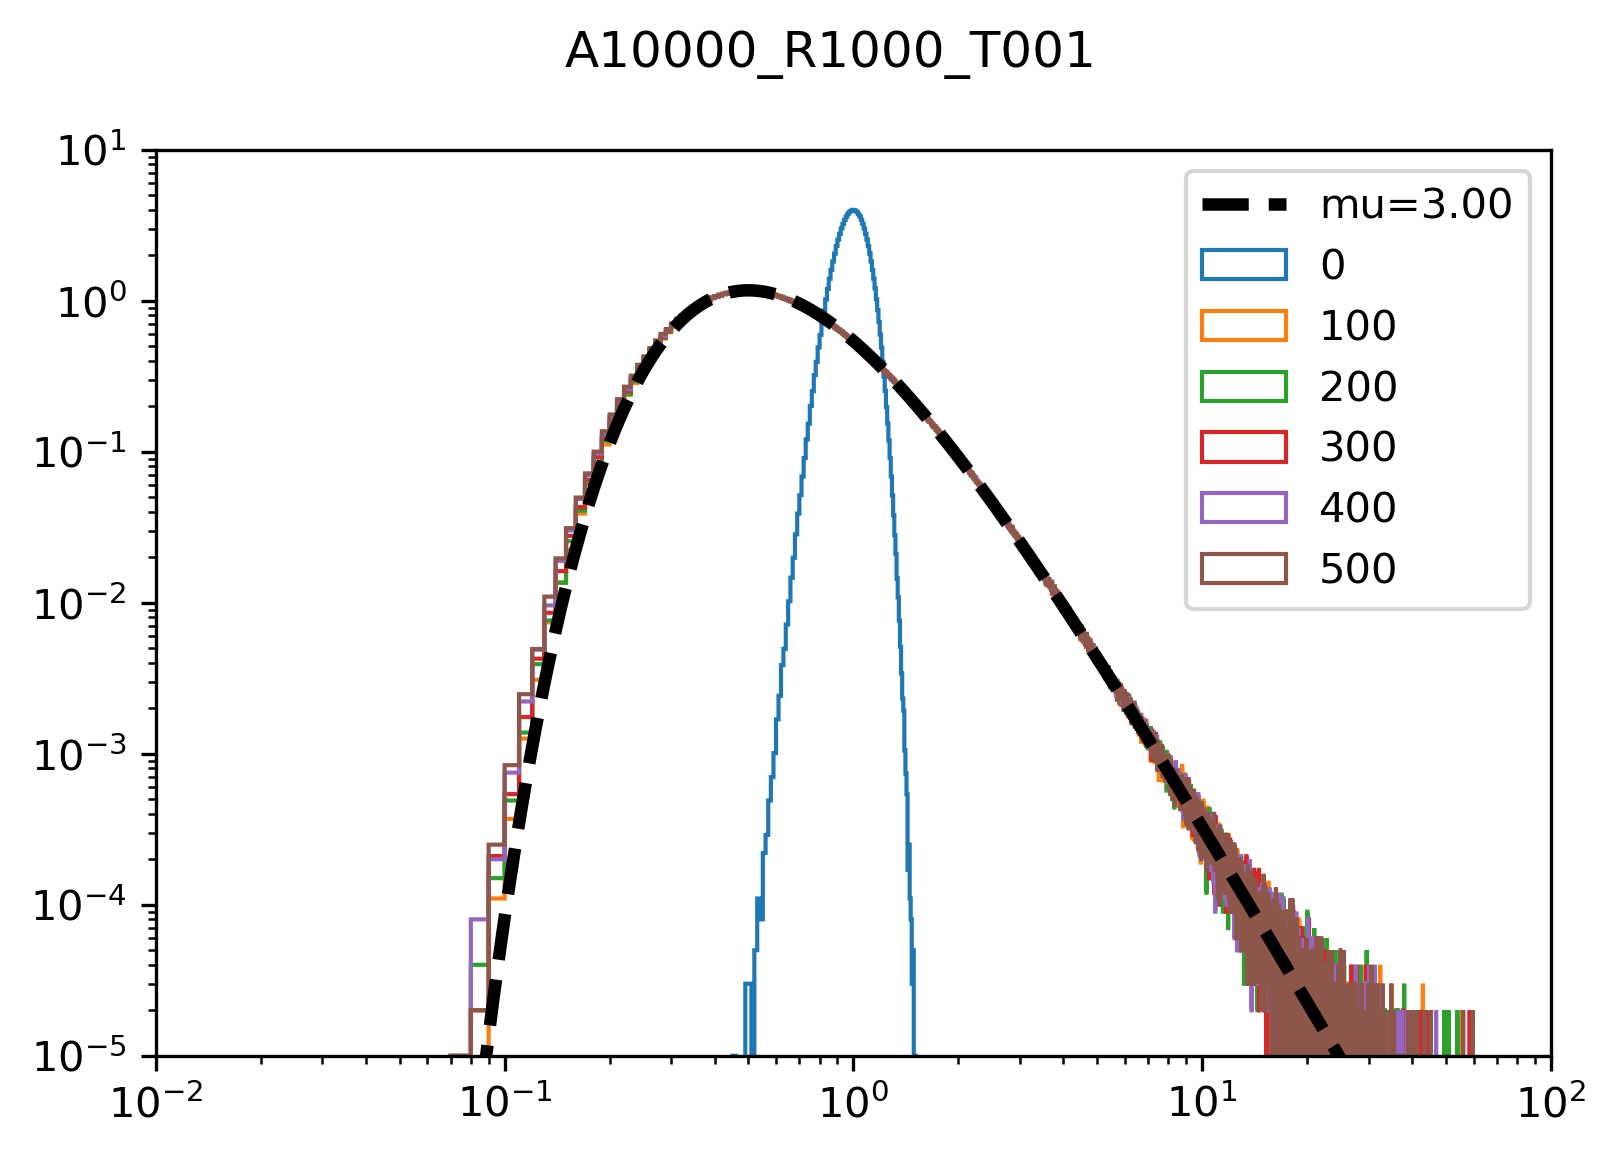

In [49]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()

# for i in [0,0.1,0.5,2,5,9]:
for i in [0,1,2,3,4,5]:
    n=i*1000
    # df=pd.read_table("./jsm/A10_R10000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001-2/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A10000_R1000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    df=pd.read_table("./jsm/A1e4_R1000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1e4_R1e4_T01/data.%d.txt"%n,sep=',',header=None)

    data=df.values
    # data=data[~np.isnan(data)].reshape(1000,1000).mean(axis=1)
    # data=data[~np.isnan(data)]
    # print(n,data.mean(),data.std(ddof=1))
    data=data[~np.isnan(data)].reshape(1000,10000)#.mean(axis=1)
    # norm = data.mean(axis=1).reshape(1000,1)
    # data=data/norm

    ax.hist(data.flatten(),bins=np.linspace(0.01,100,10000),histtype='step',label='%d'%(n*0.1),density=True)
    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
    # hi,bi=np.histogram(data,bins=100)
    # ax.plot(bi[:-1],hi)

w=np.arange(0.01,100,0.001)
miu=3
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()
ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)

ax.set_ylim([1e-5,10])
# ax.set_ylim([5e-2,5])
ax.set_xlim([1e-2,100])
# ax.set_xlim([1e-1,10])

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
fig.suptitle("A10000_R1000_T001")
plt.show()

## J-1

In [48]:

# df=pd.read_table("./jsm/A10_R1e5_T0001-J1/data_time001.txt",names=["step","vm","vi","vivj"],sep=',')
# df=pd.read_table("./jsm/A1000_R1000_T001-J1/data.txt",names=["step","vm","vi","vivj"],sep=',')
df=pd.read_table("./jsm/A1000_R1000_T001-Ji/data.txt",names=["step","vm","vi","vivj"],sep=',')
df["var"]=df.vi - df.vm**2
# df["var"]=df.vi - 1
df["cij"]=(df.vivj - df.vm**2)#/(df.var)
df

,step,vm,vi,vivj,var,cij
0,0,1.000000e+00,1.00000,1.00000,0.000000e+00,0.000000e+00
1,1,1.000110e+00,1.01022,1.00022,9.999988e-03,-1.210000e-08
2,2,1.000220e+00,1.02052,1.00043,2.007995e-02,-1.004840e-05
3,3,1.000160e+00,1.03058,1.00032,3.025997e-02,-2.560000e-08
4,4,1.000270e+00,1.04113,1.00055,4.058993e-02,9.927100e-06
...,...,...,...,...,...,...
57274,57274,1.401300e-45,0.00000,0.00000,-1.963642e-90,-1.963642e-90
57275,57275,1.401300e-45,0.00000,0.00000,-1.963642e-90,-1.963642e-90
57276,57276,1.401300e-45,0.00000,0.00000,-1.963642e-90,-1.963642e-90
57277,57277,1.401300e-45,0.00000,0.00000,-1.963642e-90,-1.963642e-90


In [ ]:
t2,var2,corr2=ro.rel_rk(0.01,T=100,N=10)

<AxesSubplot:>

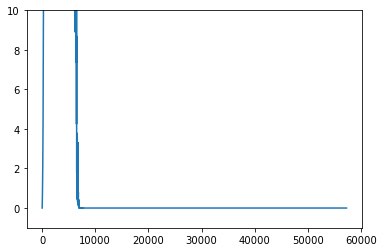

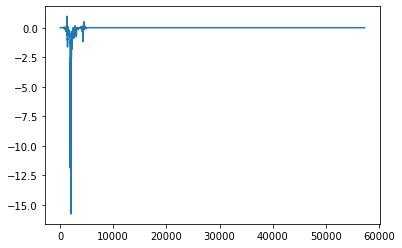

In [49]:
df["var"].plot()
plt.ylim([-1,10])
plt.figure()
df["cij"].plot()

<ipython-input-13-65113fee7922>:10: RuntimeWarning: invalid value encountered in true_divide
  cij2=df["cij"].values[::inters]/var1


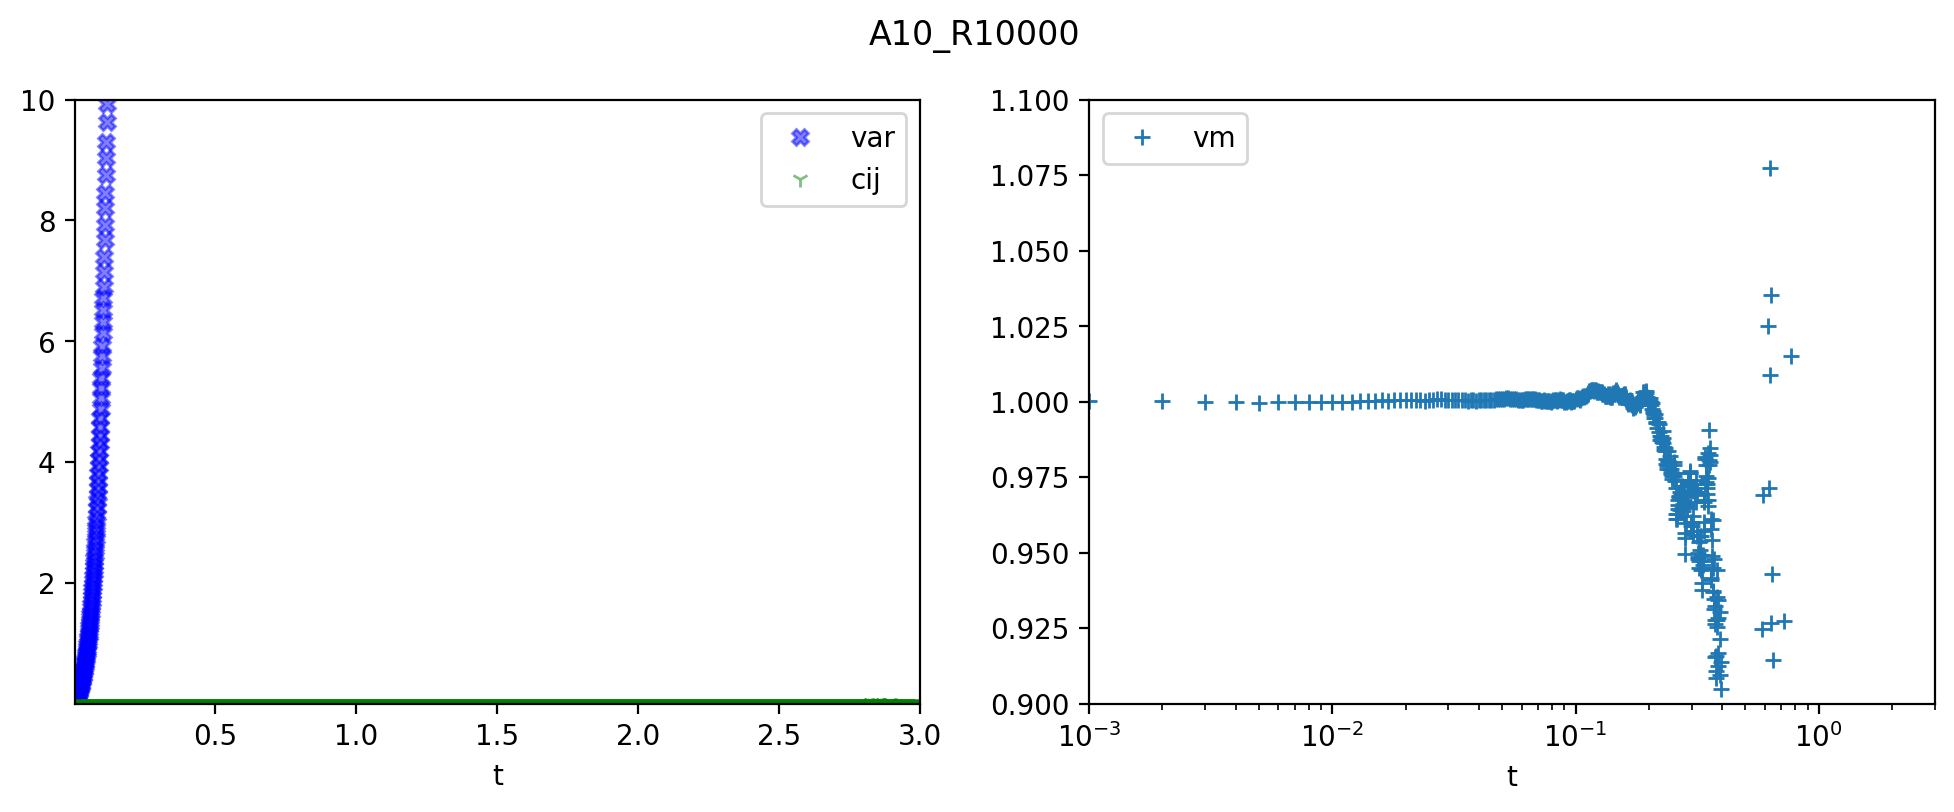

In [13]:
fig=plt.figure(figsize=(12,4),dpi=200)
ax=fig.add_subplot(1,2,1)

# ax.plot(t2,var2,lw=3,c="C1",label="var_num",zorder=3)
# ax.plot(t2,corr2,'--',lw=3,c="C3",label="cij_num",zorder=3)

inters=1
dfx=df.step.values[::inters]*0.001
var1=df["var"].values[::inters]
cij2=df["cij"].values[::inters]/var1

ax.plot(dfx,var1,'X',c='b',label="var",alpha=0.5,zorder=1)
ax.plot(dfx,cij2,'1',c='g',label="cij",alpha=0.5,zorder=1)

ax.set_xlabel('t')
ax.set_xlim([1e-3,3])
# ax.set_xlim([1e-2,1e2])
ax.set_ylim([1e-4,1e1])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.legend()

ax=fig.add_subplot(1,2,2)
ax.plot(dfx,df["vm"],'+',label="vm")
ax.set_xlabel('t')
ax.set_xlim([1e-3,3])
ax.set_ylim([0.9,1.1])
ax.set_xscale('log')
ax.legend()

# fig.suptitle("A10_R10000")
plt.show()

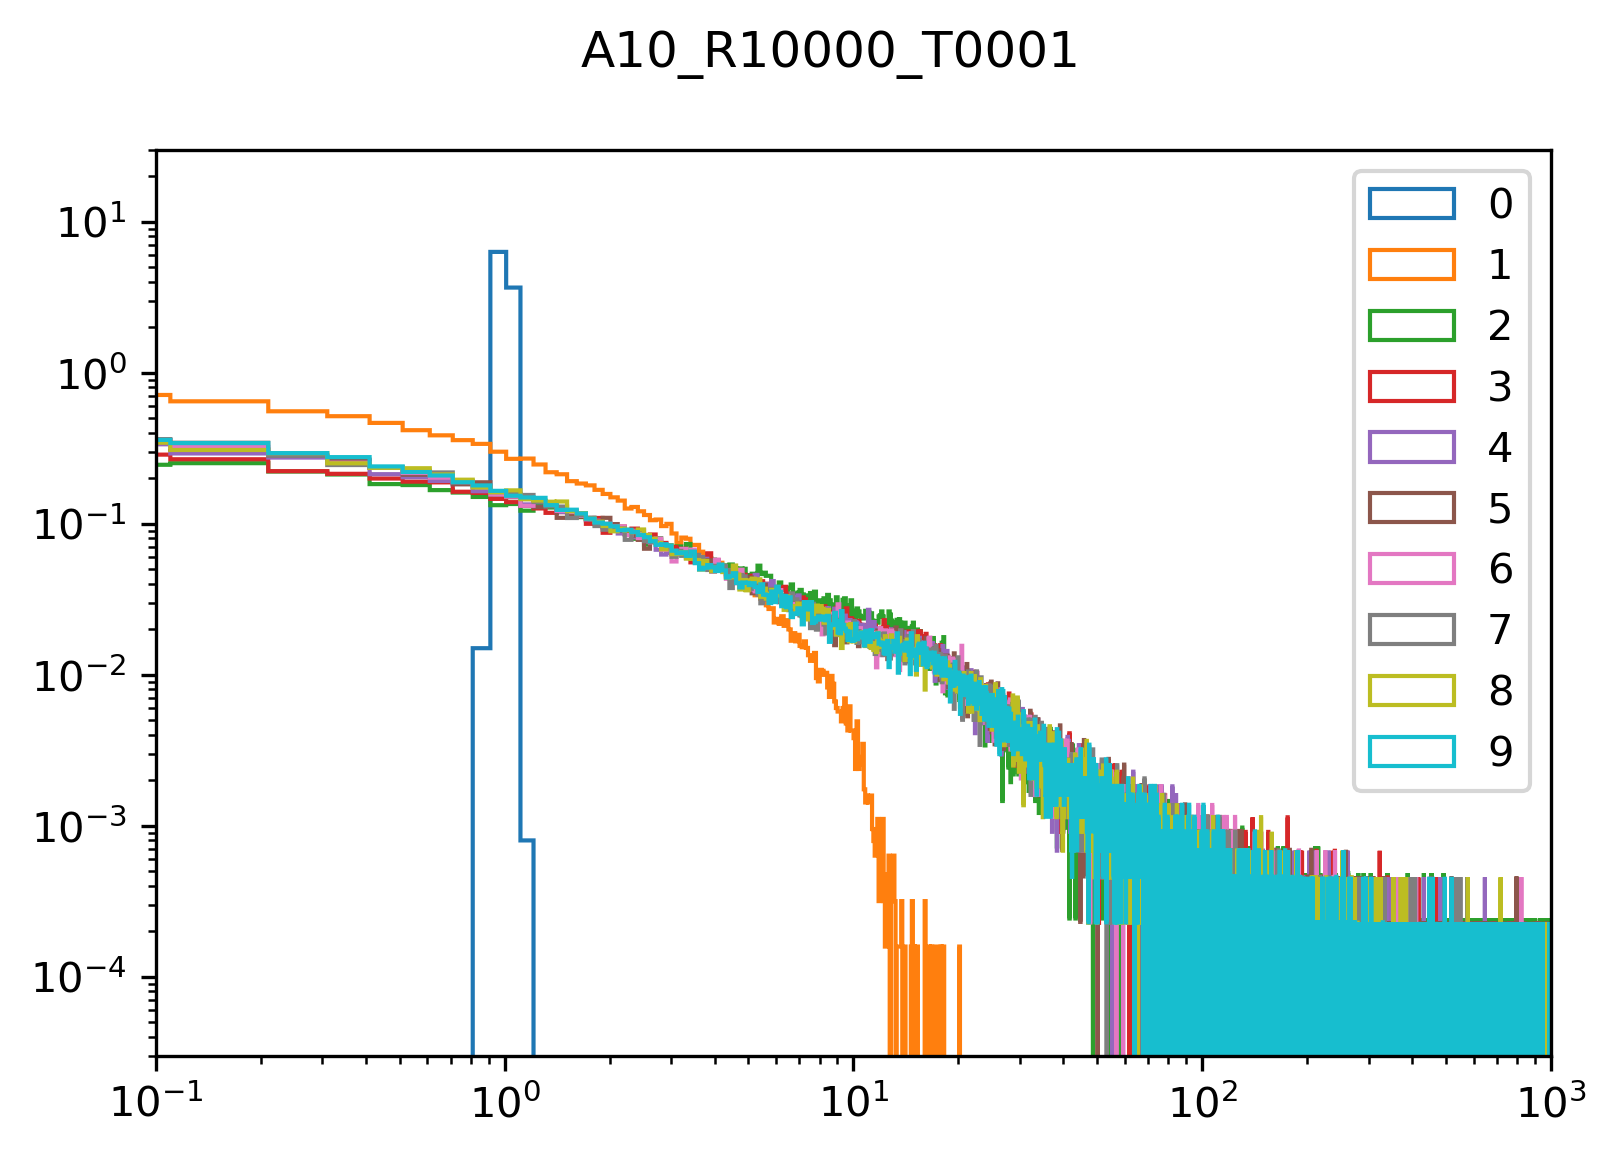

In [94]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()

# for i in [0,1,2,3,4,5,]:
# for i in [0,0.1,0.3,0.5,0.8,1,3,6]:
for i in range(10):
    n=i*1000

    # df=pd.read_table("./jsm/A10_R1e5_T0001-J1/data_time001.%d.txt"%n,sep=',',header=None)
    df=pd.read_table("./jsm/A1000_R1000_T001-J1/data.%d.txt"%n,sep=',',header=None)

    data=df.values
    # data=data[~np.isnan(data)]#.reshape(10000,10).mean(axis=1)
    # data=data[~np.isnan(data)]
    # print(n,data.mean(),data.std(ddof=1))
    data=data[~np.isnan(data)].reshape(10000,10)#.mean(axis=1)
    norm = data.mean(axis=1).reshape(10000,1)
    data=data/norm

    ax.hist(data.flatten(),bins=np.linspace(0.01,1000,10000),histtype='step',label='%d'%(n*0.001),density=True)
    # ax.hist(data.flatten(),bins=10000,histtype='step',label='%d'%(n*0.001),density=True)
    # ax.hist(data.flatten(),bins=np.linspace(-200,200,100000),histtype='step',label='%d'%(n*0.01),density=True)

    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
# hi,bi=np.histogram(data,bins=100)
# ax.plot(bi[:-1],hi)


# w=np.arange(0.01,100,0.001)
# miu=3
# # miu=0.5
# peq=np.exp(-(miu-1)/w)/w**(1+miu)
# peq=peq/(peq*(w[1]-w[0])).sum()
# ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)

ax.set_ylim([3*1e-5,30])
# ax.set_xlim([-200,200])
ax.set_xlim([1e-1,1000])
# 
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
fig.suptitle("A10_R10000_T0001")
plt.show()

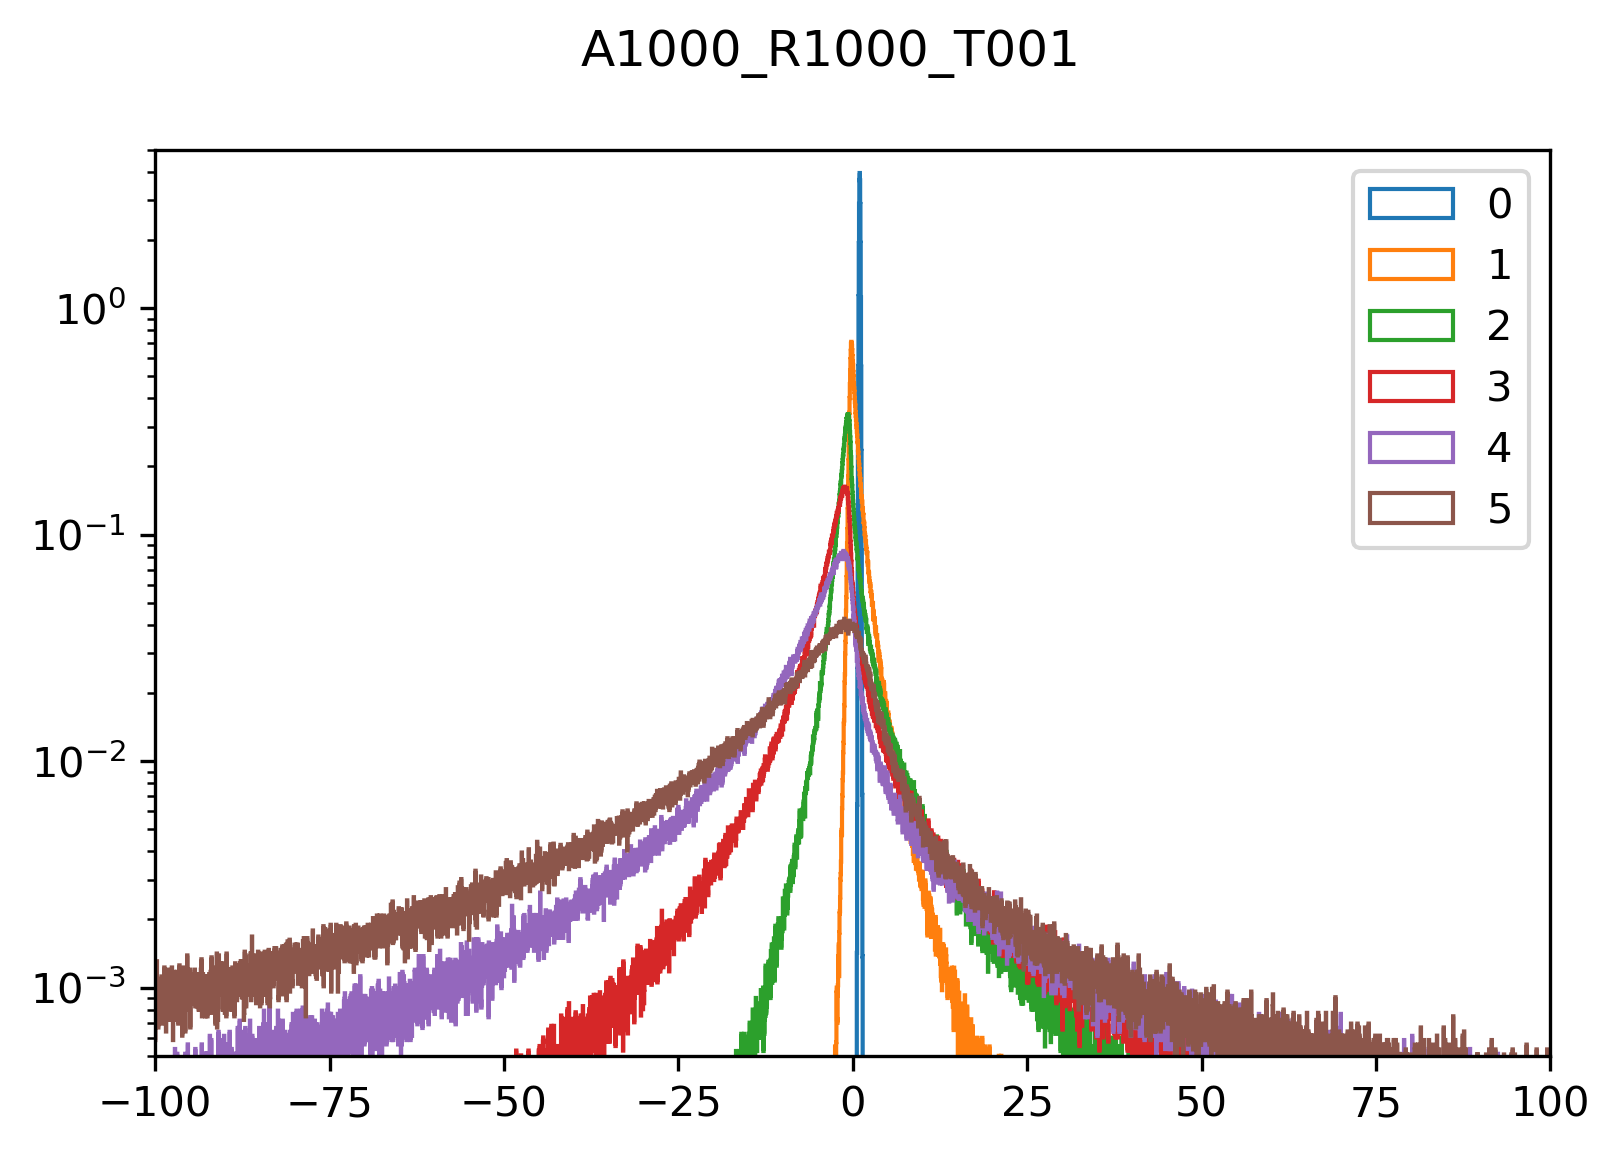

In [31]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()


# for i in [0,0.1,0.5,0.8,1,3,6]:
for i in [0,1,2,3,4,5]:
    n=i*100
    # df=pd.read_table("./jsm/A10_R10000_T001/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R10000_T001-2/data_time001.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R10000_T01/data.%d.txt"%n,sep=',',header=None)
    df=pd.read_table("./jsm/A1000_R1000_T001-J1/data.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001-Ji/data.%d.txt"%n,sep=',',header=None)
    data=df.values
    # data=data[~np.isnan(data)].reshape(1000,1000).mean(axis=1)
    data=data[~np.isnan(data)].reshape(1000,1000)#.mean(axis=1)
    # norm = data.mean(axis=1).reshape(1000,1)
    # data=data/norm


    ax.hist(data.flatten(),bins=np.linspace(-200,200,10000),histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data.flatten(),bins=np.linspace(0,50,10000),histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data.flatten(),bins=np.linspace(0.01,1000,10000),histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data.flatten(),bins=100000,histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
    # hi,bi=np.histogram(data,bins=100)
    # ax.plot(bi[:-1],hi)

w=np.arange(0.01,100,0.001)
miu=3
# miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)
peq=peq/(peq*(w[1]-w[0])).sum()
# ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)

# ax.set_ylim([1e-5,10])
ax.set_ylim([5*1e-4,5])
# ax.set_xlim([5*1e-3,30])
# ax.set_xlim([5e-3,1000])
ax.set_xlim([-100,100])
# ax.set_xlim([0,100])

ax.legend()
ax.set_yscale("log")
# ax.set_xscale("log")
fig.suptitle("A1000_R1000_T001")
plt.show()


## exchange

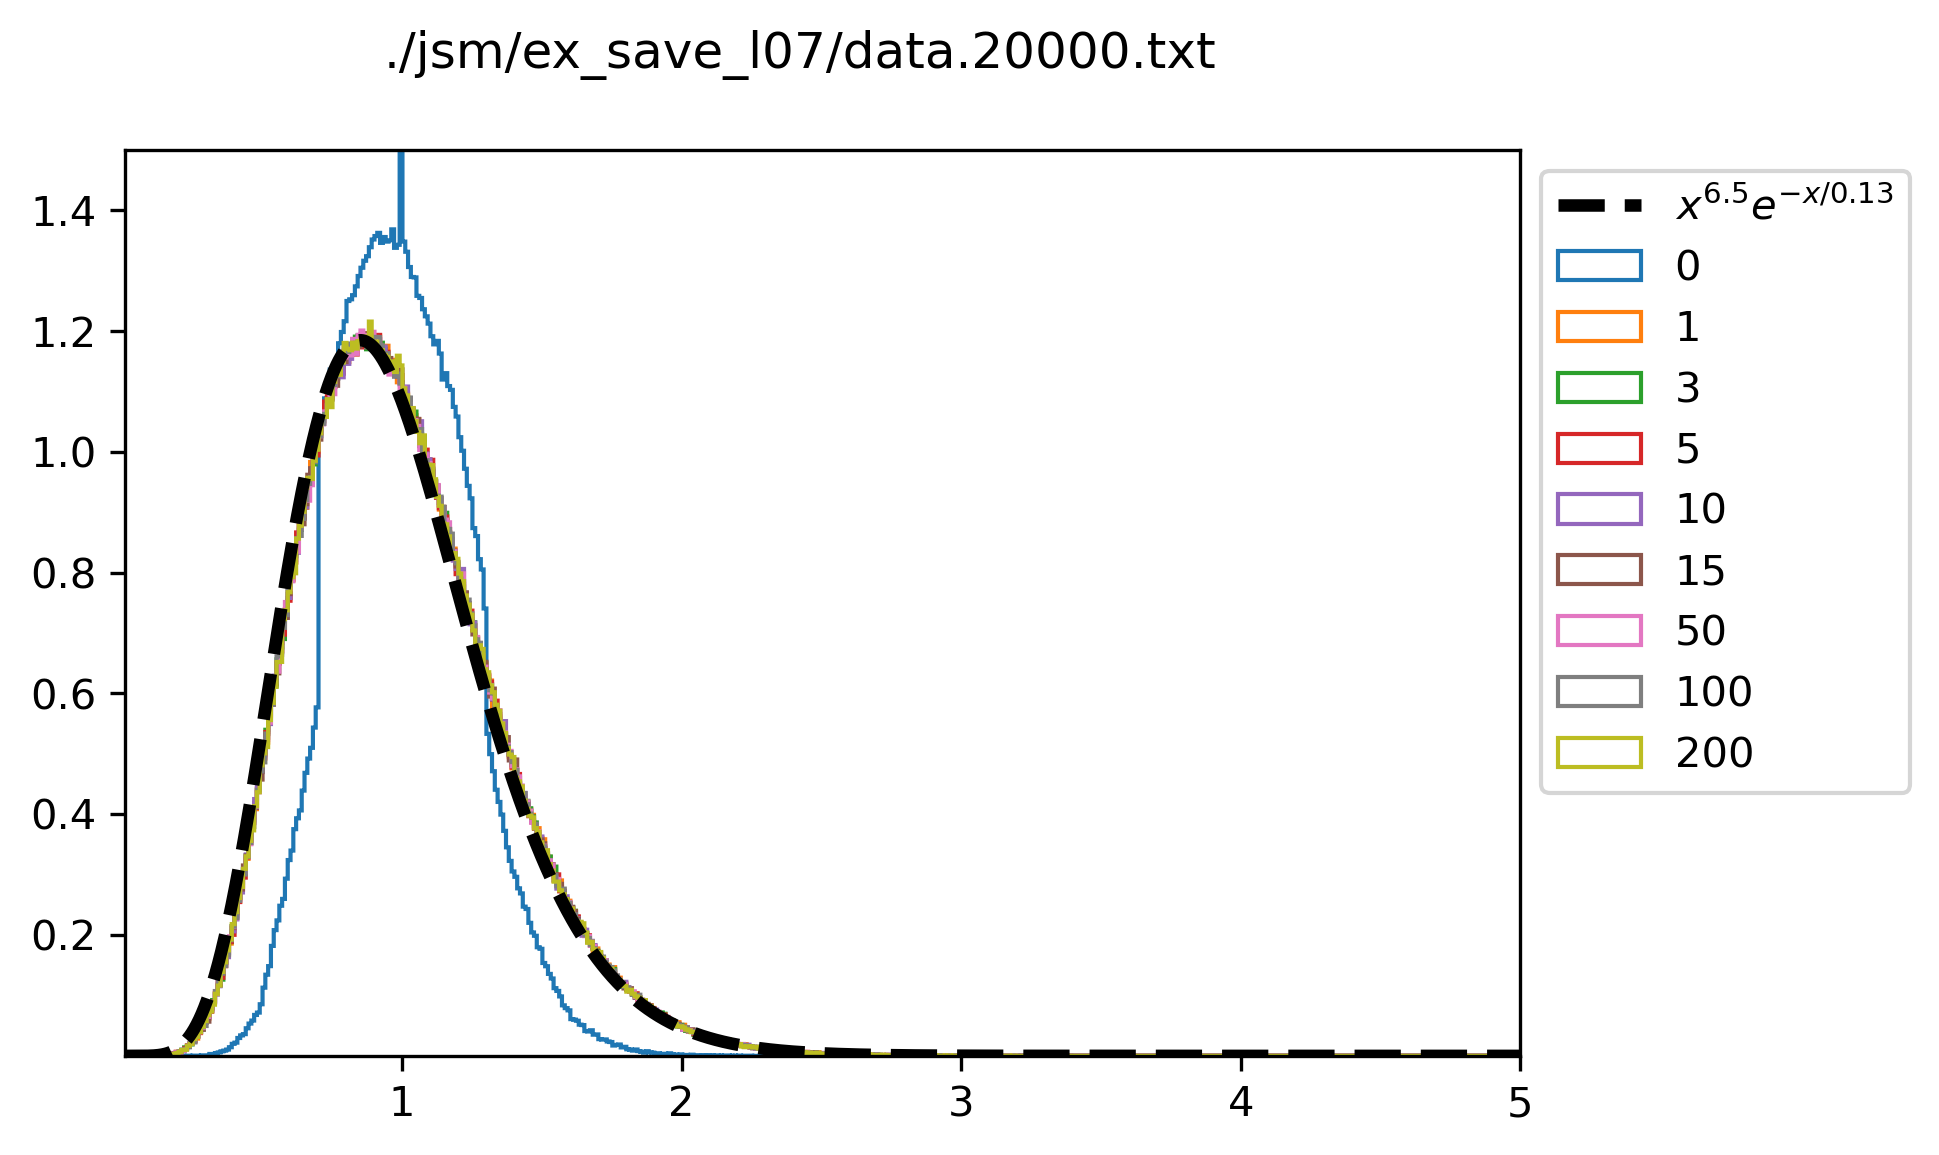

In [59]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()

for i in [0,1,3,5,10,15,50,100,200]:
# for i in [0,0.1,0.3,0.8,3,6,10,20]:
# for i in range(5):
    n=i*100

    # df=pd.read_table("./jsm/A1000_R1000_T001-J1/data.%d.txt"%n,sep=',',header=None)
    # df=pd.read_table("./jsm/A1000_R1000_T001-Ji/data.%d.txt"%n,sep=',',header=None)
    # path="./jsm/noise_limit_uniform/data.%d.txt"%n
    # path="./jsm/exJ001/data.%d.txt"%n
    # path="./jsm/exJ001g0/data.%d.txt"%n
    # path="./jsm/ex_save/data.%d.txt"%n
    # path="./jsm/ex_save01/data.%d.txt"%n
    # path="./jsm/ex_save03_r/data.%d.txt"%n
    # path="./jsm/ex_save_l03/data.%d.txt"%n
    path="./jsm/ex_save_l07/data.%d.txt"%n
    df=pd.read_table(path,sep=',',header=None)
    # df=pd.read_table(,sep=',',header=None)

    data=df.values
    # data=data[~np.isnan(data)]#.reshape(10000,10).mean(axis=1)
    # data=data[~np.isnan(data)]
    # print(n,data.mean(),data.std(ddof=1))
    data=data[~np.isnan(data)].reshape(1000,1000)#.mean(axis=1)
    norm = data.mean(axis=1).reshape(1000,1)
    data=data/norm

    ax.hist(data.flatten(),bins=np.linspace(-0,10,1000),histtype='step',label='%d'%(n*0.01),density=True,)
    # ax.hist(data.flatten(),bins=100000,histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data.flatten(),bins=np.linspace(-200,200,100000),histtype='step',label='%d'%(n*0.01),density=True)

    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
# hi,bi=np.histogram(data,bins=100)
# ax.plot(bi[:-1],hi)


pam=[7.54,0.13]
w=np.arange(0.01,100,0.001)
miu=3
# miu=0.5
# peq=np.exp(-(miu-1)/w)/w**(1+miu)
# peq=np.exp(-w)
peq=np.exp(-w/pam[1])*w**(pam[0]-1)
peq=peq/(peq*(w[1]-w[0])).sum()
# ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)
ax.plot(w,peq,'--',c='k',lw=3,label=r"$x^{%.1f} e^{-x/%.2f}$"%(pam[0]-1,pam[1]))

ax.set_ylim([3*1e-5,1.50])
# ax.set_xlim([-200,200])
ax.set_xlim([1e-2,5])
# # ax.set_ylim([1e-5,10])



ax.legend(bbox_to_anchor=(1,1),loc="upper left")
# ax.set_yscale("log")
# ax.set_xscale("log")
# fig.suptitle("A1000_R1000_T001-Ji")
fig.suptitle(path)
plt.show()

(7.541933695131144, 0.028185680388007284, 0.1288547436625863)


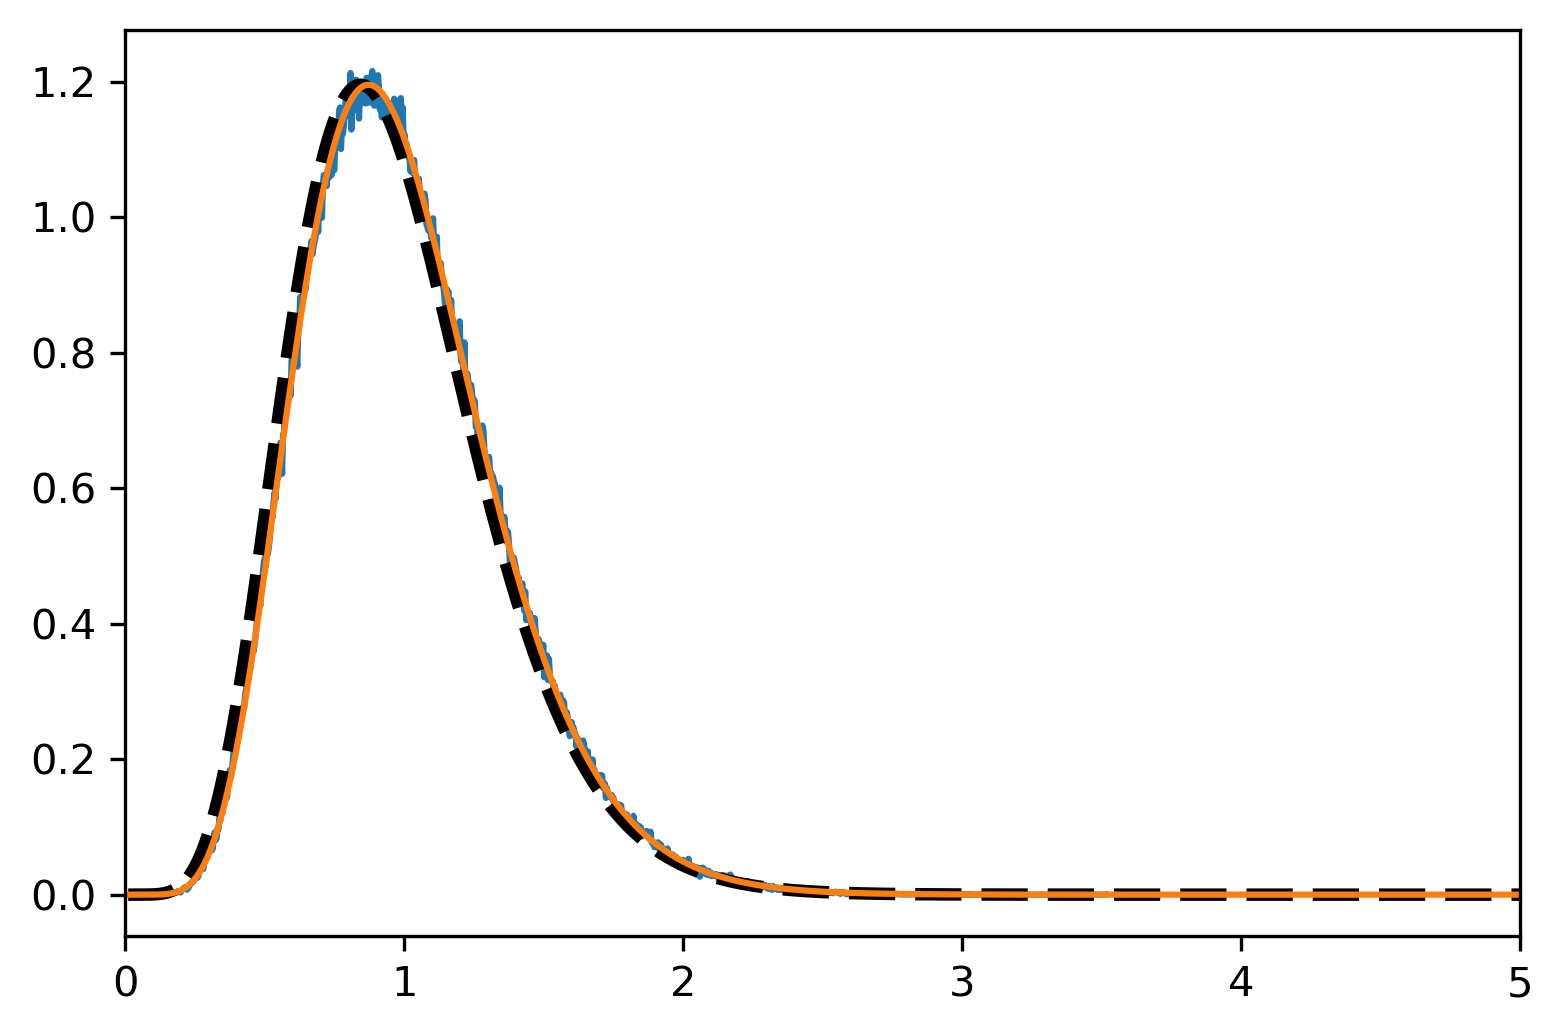

In [56]:
from scipy.stats import gamma
paras=gamma.fit(data.flatten(),loc=0)
print(paras)

fig=plt.figure(dpi=300)
ax=fig.add_subplot()

hi,bi=np.histogram(data.flatten(),bins=1000,density=True)
ax.plot(bi[:-1],hi)

w=np.arange(0.01,100,0.001)
peq=np.exp(-w/paras[2])*w**(paras[0]-1)
peq=peq/(peq*(w[1]-w[0])).sum()
ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)
ax.set_xlim([0,5])

ax.plot(w,gamma.pdf(w,*paras))

plt.show()

In [45]:
-1-np.log(2)/np.log(1-0.07)

8.551337509447336

In [67]:
lamba=0.69
3*lamba/(1-lamba)

6.677419354838708

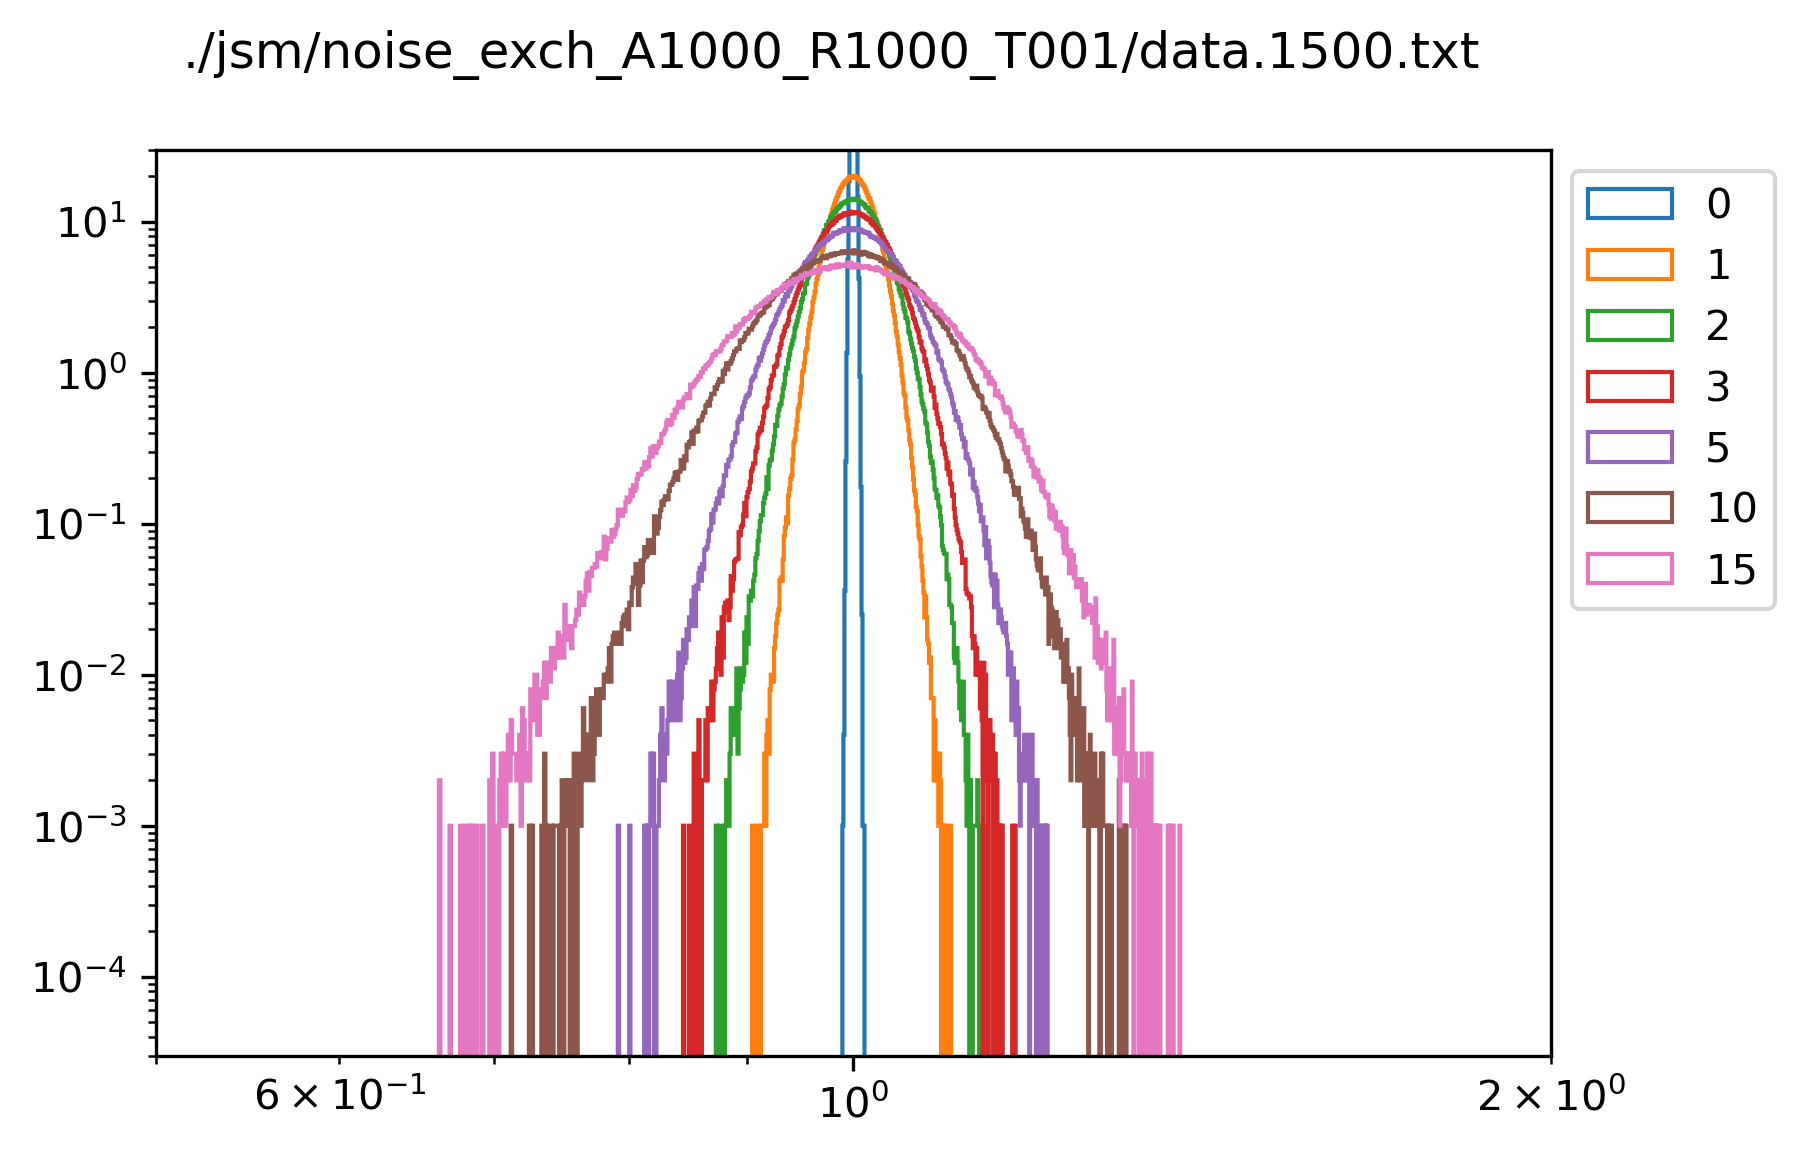

In [249]:
fig=plt.figure(dpi=300)
ax=fig.add_subplot()

# for i in [0,0.01,0.05,0.1,0.5,5,11]:
# for i in [0,0.1,0.5,5,14]:
for i in [0,1,2,3,5,10,15]:
# for i in [0,0.1,0.3,0.8,3,6,10,14]:
# for i in range(7):
    n=i*100
    path="./jsm/noise_exch_A1000_R1000_T001/data.%d.txt"%n
    # path="./jsm/noise_J01/data.%d.txt"%n
    # path="./jsm/noise_01/data.%d.txt"%n
    # path="./jsm/noise_bi/data.%d.txt"%n
    # path="./jsm/noise_bi001/data.%d.txt"%n
    df=pd.read_table(path,sep=',',header=None)

    data=df.values
    data=data[~np.isnan(data)].reshape(1000,1000)#.mean(axis=1)
    norm = data.mean(axis=1).reshape(1000,1)
    data=data/norm

    ax.hist(data.flatten(),bins=np.linspace(0.01,10,10000),histtype='step',label='%d'%(n*0.01),density=True,)
    # ax.hist(data.flatten(),bins=100000,histtype='step',label='%d'%(n*0.01),density=True)
    # ax.hist(data.flatten(),bins=np.linspace(-200,200,100000),histtype='step',label='%d'%(n*0.01),density=True)

    # ax.hist(data,bins=np.linspace(0.1,10,100),histtype='step',label='%d'%i)
# hi,bi=np.histogram(data,bins=100)
# ax.plot(bi[:-1],hi)


# w=np.arange(0.01,100,0.001)
# miu=3
# # miu=0.5
# peq=np.exp(-(miu-1)/w)/w**(1+miu)
# peq=peq/(peq*(w[1]-w[0])).sum()
# ax.plot(w,peq,'--',c='k',lw=3,label="mu=%.2f"%miu)

# # ax.set_ylim([1e-5,10])
ax.set_ylim([3*1e-5,30])
# ax.set_xlim([-200,200])
# ax.set_xlim([1e-2,1000])
# ax.set_xlim([-1000,1000])
ax.set_xlim([0.5,2])


ax.legend(bbox_to_anchor=(1,1),loc="upper left")
ax.set_yscale("log")
ax.set_xscale("log")
# fig.suptitle("A1000_R1000_T001-Ji")
fig.suptitle(path)
plt.show()

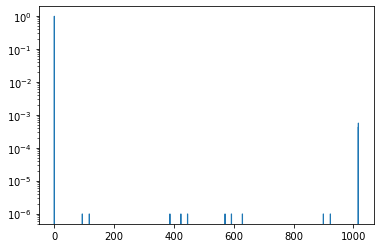

In [203]:
# path="./jsm/noise_01/data.%d.txt"%1000
# path="./jsm/noise_bi/data.%d.txt"%200
path="./jsm/noise_bi001/data.%d.txt"%110000
# path="./jsm/noise_exch_A1000_R1000_T001/data.%d.txt"%n
df=pd.read_table(path,sep=',',header=None)

data=df.values
data=data[~np.isnan(data)].reshape(1000,1000)#.mean(axis=1)
norm = data.mean(axis=1).reshape(1000,1)
data=data/norm
# plt.hist(data.flatten(),bins=np.linspace(-1e6,1e6,1000),histtype='step',label='%d'%(n*0.01),density=True,)
plt.hist(data.flatten(),bins=1000,histtype='step',label='%d'%(n*0.01),density=True,)
plt.yscale("log")
plt.yscale("log")
plt.show()

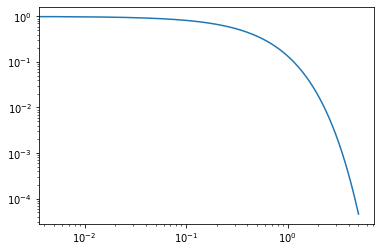

In [235]:
x=np.linspace(0,5,1000)
y=np.exp(-x/0.5)
plt.figure()
plt.plot(x,y)
plt.xscale("log")
plt.yscale("log")
plt.show()
